<a href="https://colab.research.google.com/github/kohi2112002/WineQuality/blob/FINAL/WineQuality_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone **DATA**


In [20]:
import pandas as pd
import numpy as np
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn import datasets, metrics, model_selection, svm

In [3]:
!git clone https://github.com/kohi2112002/WineQuality.git

Cloning into 'WineQuality'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 48 (delta 25), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (48/48), done.


In [4]:
# upload file to drive
red_path = '/content/WineQuality/winequality-red.csv'
white_path = '/content/WineQuality/winequality-white.csv'

In [5]:
# read file into dataframe
red_df = pd.read_csv(red_path)
white_df = pd.read_csv(white_path)
full = pd.concat([red_df, white_df])

In [6]:
# check 
print(red_df.shape)
print(white_df.shape)

(1599, 12)
(4898, 12)


# **Check data**

Text(0.5, 1.0, 'Correlation between variables')

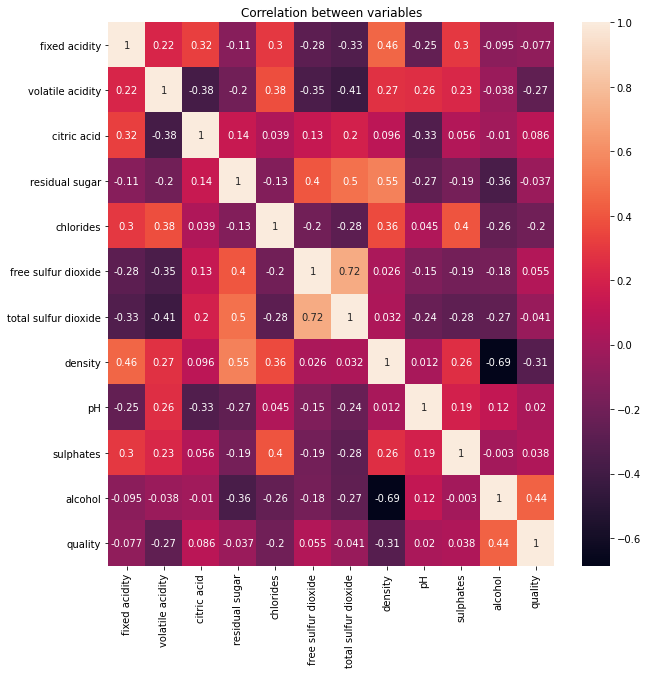

In [7]:
#Check correlation
corr = full.corr()
fig, ax = plt.subplots(figsize = (10,10))
g= sns.heatmap(corr,ax=ax, annot= True)
ax.set_title('Correlation between variables')

In [8]:
corr_vec = full.corr()['quality']
print(abs(corr_vec) > 0.05)
print((abs(corr_vec)).idxmin())

fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar          False
chlorides                True
free sulfur dioxide      True
total sulfur dioxide    False
density                  True
pH                      False
sulphates               False
alcohol                  True
quality                  True
Name: quality, dtype: bool
pH


In [9]:
#Remove not needed data
# opt_data = full.drop(['residual sugar','pH','sulphates','total sulfur dioxide'], axis = 1)
opt_data = full

In [28]:
#This function calculate the 
def re_cm(cnf_matrix):
  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)

  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  # Negative predictive value
  NPV = TN/(TN+FN)
  # Fall out or false positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)
  # False discovery rate
  FDR = FP/(TP+FP)
  # Overall accuracy
  ACC = (TP+TN)/(TP+FP+FN+TN)
  
  TPR[np.isnan(TPR)] = mean(TPR[np.logical_not(np.isnan(TPR))])
  FNR[np.isnan(FNR)] = mean(FNR[np.logical_not(np.isnan(FNR))])
  PPV[np.isnan(PPV)] = mean(PPV[np.logical_not(np.isnan(PPV))])

  return [ACC, TPR, FPR, FNR, PPV]

In [11]:
#Scale data with MinMax Scaler
scaler = MinMaxScaler()

#this function return scaled data
def Khoi_Scaler(data):
  scaler.fit(data)
  return scaler.transform(data)

In [12]:
#Scale data with Robust Scaler
transform = RobustScaler()

#this funtion return scaled data
def Khoi_Robust(data):
  return transform.fit_transform(data)

In [13]:
#Scale data with Standard Scaler
khoi_scaler = StandardScaler()

#this function return data scaled by Standard Scaler
def Khoi_SD_Scaler(data):
  return khoi_scaler.fit_transform(data)

In [14]:
#this function return Standard Deviation
def KHOI_standard_deviation(y_true, y_pred):
  if(len(y_true) != len(y_pred)):
    print("Error")
  N = len(y_true)
  mean_y_true = np.mean(y_true, dtype=np.float64)
  mean_array = np.array([mean_y_true for i in range(N)])
  distance = (y_pred - mean_array)
  sum_dis = distance @ distance.T
  mean_sum_dis = sum_dis/N
  return math.sqrt(mean_sum_dis)

In [15]:
#This function return accuracy rate
def KHOI_Accuracy(y_true, y_pred):
		m = np.size(y_true)
		error = y_pred - y_true 
		return (1/(2*m)) * (np.transpose(error)@error)

In [16]:
#This function print the linear regression equation 
def Khoi_LE(para):
  return ('Y = {}X'.format(para))

In [17]:
#Data partition

#This is function return train and target data set
def needed_data(data, target_label, index):
  #Scale data
  data = Khoi_Robust(data)
  # data = Khoi_SD_Scaler(data)
  # data = Khoi_Scaler(data)
  #split data
  X_train_full1, X_test_full1,Y_train_full1,Y_test_full1 = train_test_split(np.delete(data, index, axis = 1),data[:,index], test_size = 0.1, random_state = 100)
  X_train_full2, X_test_full2,Y_train_full2, Y_test_full2 = train_test_split(np.delete(data, index, axis = 1),data[:,index], test_size = 0.1, random_state = 220)
  X_train_full3, X_test_full3,Y_train_full3,Y_test_full3 = train_test_split(np.delete(data, index, axis = 1),data[:,index], test_size = 0.1, random_state = 343)
  #store data
  X_train_full = [X_train_full1, X_train_full2, X_train_full3]
  X_test_full = [X_test_full1, X_test_full2, X_test_full3]
  Y_train_full = [Y_train_full1, Y_train_full2, Y_train_full3]
  Y_test_full = [Y_test_full1, Y_test_full2, Y_test_full3]  
  #return data
  return [X_train_full, X_test_full, Y_train_full, Y_test_full]

In [37]:
#This function plot comparision
def Khoi_Plot(y_true, y_pred, _in, label):
  plt.figure(figsize=(50,5))
  plt.figure(_in)
  plt.title(label, fontsize='xx-large')
  plt.plot(y_true, color='green')
  plt.plot(y_pred, color='red')

In [42]:
#This function plot ROC curve
def Khoi_ROC(TP, FP, index, label):
  plt.figure(figsize=(100,50))
  plt.subplot(12,3, index + 1)
  plt.title(label)  
  sns.lineplot(x=FP, y=TP)

# **Linear Regresstion**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide




The Linear Regression Equation of fixed acidity in 0th test: 
Y = [-0.07629574  0.12769567 -1.16711963 -0.07846719 -0.02077804  0.00409783
  2.21474268 -0.6403608  -0.1080311   0.88144108  0.03597504]X
The RMSE of fixed acidity in 0th test: 0.4159841873082236
The SD of fixed acidity in 0th test: 0.8160282280189218
The Confusion matrix of fixed acidity in 0th test: 
[[ 17  22   0   0   0   0]
 [  5 506  10   2   0   0]
 [  0  20  33   1   0   0]
 [  0   1   9  11   0   0]
 [  0   0   1   4   5   0]
 [  0   0   0   0   3   0]]
The Accuracy is: 0.96 
The True positive rate is: 0.506385548450558 
The False Positive Rate is: 0.06602321767258747 
The False Negative Rate is:0.493614451549442 
The Precision is 0.7106311334814274

The Mean Performance of fixed acidity in 0th test: 0.44416358778850373




The Linear Regression Equation of fixed acidity in 1th test: 
Y = [-0.08719736  0.12636467 -1.17039303 -0.07331783 -0.01858012 -0.00540149
  2.22042876 -0.64647249 -0.10785058  0.88952753  0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide




The Linear Regression Equation of fixed acidity in 2th test: 
Y = [-0.08497352  0.12833759 -1.17023004 -0.07247541 -0.01327015 -0.0060153
  2.2119204  -0.64785028 -0.10995501  0.88372036  0.03084858]X
The RMSE of fixed acidity in 2th test: 0.4155908479335387
The SD of fixed acidity in 2th test: 0.9106589749821239
The Confusion matrix of fixed acidity in 2th test: 
[[  0   1   0   0   0   0   0   0]
 [  0  19  19   0   0   0   0   0]
 [  0   6 503  13   0   0   0   0]
 [  0   0  16  31   5   0   0   0]
 [  0   0   0  11   7   2   0   0]
 [  0   0   0   0   6   3   1   0]
 [  0   0   0   0   0   4   0   0]
 [  0   0   0   0   0   0   2   1]]
The Accuracy is: 0.966923076923077 
The True positive rate is: 0.3803860890067786 
The False Positive Rate is: 0.044561058508695094 
The False Negative Rate is:0.6196139109932213 
The Precision is 0.564510293506576

The Mean Performance of fixed acidity in 2th test: 0.40226783800381777




The Linear Regression Equation of volatile acidity in 0th t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide




The Linear Regression Equation of volatile acidity in 1th test: 
Y = [-0.19328211 -0.3176224  -0.62014075  0.1214382  -0.08834172 -0.04457003
  1.39019063 -0.1386896  -0.09140856  0.75293257 -0.19307376]X
The RMSE of volatile acidity in 1th test: 0.7107184033543489
The SD of volatile acidity in 1th test: 0.6928608930603642
The Confusion matrix of volatile acidity in 1th test: 
[[  0   0   0   0   0   0   0]
 [  5 488  31   0   0   0   0]
 [  0  28  41   2   0   0   0]
 [  0  10  28   6   0   0   0]
 [  0   2   3   2   0   0   0]
 [  0   1   1   1   0   0   0]
 [  0   0   1   0   0   0   0]]
The Accuracy is: 0.9494505494505495 
The True positive rate is: 0.2741876891699491 
The False Positive Rate is: 0.06455362343483355 
The False Negative Rate is:0.7258123108300509 
The Precision is 0.46460650250820384

The Mean Performance of volatile acidity in 1th test: 0.38229003148575935




The Linear Regression Equation of volatile acidity in 2th test: 
Y = [-0.19005423 -0.30899777 -0.6341857

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide




The Linear Regression Equation of citric acid in 0th test: 
Y = [ 0.42275726 -0.45890531  0.06264183  0.12937123 -0.0338874   0.32248073
  0.06374666 -0.11688584  0.05042586  0.2748129  -0.02116003]X
The RMSE of citric acid in 0th test: 0.7514718941525768
The SD of citric acid in 0th test: 0.6199440411664359
The Confusion matrix of citric acid in 0th test: 
[[  0  15  13   0   0   0]
 [  1  19  32   0   0   0]
 [  0   4 460   8   1   0]
 [  0   0  68   9   2   0]
 [  0   0   9   5   0   0]
 [  0   0   3   1   0   0]]
The Accuracy is: 0.916923076923077 
The True positive rate is: 0.2419707537090522 
The False Positive Rate is: 0.12813839191364046 
The False Negative Rate is:0.7580292462909478 
The Precision is 0.3355258268301746

The Mean Performance of citric acid in 0th test: 0.3659160546859538




The Linear Regression Equation of citric acid in 1th test: 
Y = [ 0.40978197 -0.46467568  0.04064052  0.11274007 -0.04737019  0.33669422
  0.10393359 -0.12818937  0.05053731  0.28422385 -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (T



The Linear Regression Equation of citric acid in 2th test: 
Y = [ 0.42328446 -0.45565888  0.07031798  0.11883457 -0.04994128  0.33275691
  0.05153028 -0.12217276  0.05604529  0.25665816 -0.02026092]X
The RMSE of citric acid in 2th test: 0.7654249361439279
The SD of citric acid in 2th test: 0.6427103073235467
The Confusion matrix of citric acid in 2th test: 
[[  2  12   7   0   0   0   0]
 [  1  21  35   1   0   0   0]
 [  1   8 465   7   0   0   0]
 [  0   0  53  11   0   0   0]
 [  1   0   9   7   1   0   0]
 [  0   0   5   1   1   0   0]
 [  0   0   1   0   0   0   0]]
The Accuracy is: 0.934065934065934 
The True positive rate is: 0.2359247975781227 
The False Positive Rate is: 0.10261812369331653 
The False Negative Rate is:0.7640752024218773 
The Precision is 0.525659636306508

The Mean Performance of citric acid in 2th test: 0.40706943999995615




The Linear Regression Equation of residual sugar in 0th test: 
Y = [-0.44788843 -0.10315859  0.00726113 -0.06147927  0.02154177  0.1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 f



The Linear Regression Equation of residual sugar in 1th test: 
Y = [-0.44395628 -0.10612322  0.0047538  -0.06447339  0.02150747  0.16848587
  1.52700037 -0.3764755  -0.13545224  0.59085667  0.04031225]X
The RMSE of residual sugar in 1th test: 0.28238778321298424
The SD of residual sugar in 1th test: 0.7075294774819725
The Confusion matrix of residual sugar in 1th test: 
[[  0   0   0   0   0   0   0]
 [  3 496  11   0   0   0   0]
 [  0  23  81   1   0   0   0]
 [  0   0  21  12   0   0   0]
 [  0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0]]
The Accuracy is: 0.9731868131868131 
The True positive rate is: 0.42152279093455564 
The False Positive Rate is: 0.03319952112224788 
The False Negative Rate is:0.5784772090654443 
The Precision is 0.5059282048284043

The Mean Performance of residual sugar in 1th test: 0.38478193148766304




The Linear Regression Equation of residual sugar in 2th test: 
Y = [-0.44715845 -0.10834596  0.00814663 -0.058675

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This i



The Linear Regression Equation of chlorides in 0th test: 
Y = [-0.39871571  0.27941737  0.19856288 -0.81404703  0.11425499 -0.29652058
  1.29014477 -0.40623812  0.28968192 -0.00748831 -0.0226984 ]X
The RMSE of chlorides in 0th test: 0.9494490232167104
The SD of chlorides in 0th test: 0.7855524375754369
The Confusion matrix of chlorides in 0th test: 
[[  0   7   0   0   0   0   0   0   0   0   0]
 [  9 466  41   1   1   0   0   0   0   0   0]
 [  0  15  77   5   0   0   0   0   0   0   0]
 [  0   4   8   3   0   0   0   0   0   0   0]
 [  0   0   1   1   0   0   0   0   0   0   0]
 [  0   4   1   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0]]
The Accuracy is: 0.970909090909091 
The True positive rate is: 0.1721298484185082 
The False Positive Rate is: 0.033952797194943

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This i



The Linear Regression Equation of chlorides in 2th test: 
Y = [-0.37603317  0.27278981  0.18693896 -0.79671586  0.12182807 -0.30604188
  1.2558405  -0.40248234  0.30011256 -0.02689919 -0.02613055]X
The RMSE of chlorides in 2th test: 0.8383563120482372
The SD of chlorides in 2th test: 0.7996296932600826
The Confusion matrix of chlorides in 2th test: 
[[  0   6   0   0   0   0   0   0   0]
 [ 11 463  47   2   0   0   0   0   0]
 [  0  15  66   7   0   0   0   0   0]
 [  0   4  13   2   0   0   0   0   0]
 [  0   1   3   0   0   0   0   0   0]
 [  0   3   2   1   0   0   0   0   0]
 [  0   1   1   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0]]
The Accuracy is: 0.9593162393162393 
The True positive rate is: 0.19339337828318406 
The False Positive Rate is: 0.04400506694924779 
The False Negative Rate is:0.806606621716816 
The Precision is 0.3977732793522267

The Mean Performance of chlorides in 2th test: 0.36044458657536865




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This i



The Linear Regression Equation of free sulfur dioxide in 0th test: 
Y = [-0.02573463 -0.04776204 -0.01267759  0.06952487  0.02784924  0.69891076
  0.00111066  0.02875112  0.00755147 -0.0135801   0.07228305]X
The RMSE of free sulfur dioxide in 0th test: 0.4920470876467262
The SD of free sulfur dioxide in 0th test: 0.5270993342449614
The Confusion matrix of free sulfur dioxide in 0th test: 
[[  2  13   0   0   0   0]
 [  2 553   8   0   0   0]
 [  0  57  12   0   0   0]
 [  0   1   0   0   0   0]
 [  0   1   0   0   0   0]
 [  0   0   1   0   0   0]]
The Accuracy is: 0.9574358974358974 
The True positive rate is: 0.21491406457813134 
The False Positive Rate is: 0.1410377244597645 
The False Negative Rate is:0.7850859354218688 
The Precision is 0.6520761904761905

The Mean Performance of free sulfur dioxide in 0th test: 0.4482784787339888




The Linear Regression Equation of free sulfur dioxide in 1th test: 
Y = [-0.02275351 -0.04880647 -0.01788866  0.06943536  0.02652167  0.70566587
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This i



The Linear Regression Equation of free sulfur dioxide in 2th test: 
Y = [-0.01642567 -0.05056537 -0.01874254  0.07388566  0.02906426  0.70326895
 -0.01966086  0.03847484  0.00610446 -0.01921417  0.0700406 ]X
The RMSE of free sulfur dioxide in 2th test: 0.49308889089909375
The SD of free sulfur dioxide in 2th test: 0.5354851282602326
The Confusion matrix of free sulfur dioxide in 2th test: 
[[  6  26   0   0   0   0]
 [  0 547   9   0   0   0]
 [  0  50   5   0   0   0]
 [  0   4   1   0   0   0]
 [  0   1   0   0   0   0]
 [  0   0   1   0   0   0]]
The Accuracy is: 0.9528205128205128 
The True positive rate is: 0.21037034009156308 
The False Positive Rate is: 0.14669825376959295 
The False Negative Rate is:0.7896296599084369 
The Precision is 0.727839702760085

The Mean Performance of free sulfur dioxide in 2th test: 0.4686344891324195




The Linear Regression Equation of total sulfur dioxide in 0th test: 
Y = [ 0.00343189 -0.01439558  0.08157712  0.38191701 -0.04887188  0.47259359

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 f



The Linear Regression Equation of total sulfur dioxide in 1th test: 
Y = [-0.00445718 -0.0165921   0.08567524  0.36652349 -0.04868924  0.47549509
 -0.45124697  0.02426059  0.01809038 -0.33890571 -0.05963291]X
The RMSE of total sulfur dioxide in 1th test: 0.44294934841152644
The SD of total sulfur dioxide in 1th test: 0.5903246453776575
The Confusion matrix of total sulfur dioxide in 1th test: 
[[ 34  52   0   0   0]
 [  4 496  15   0   0]
 [  0  34  13   1   0]
 [  0   0   0   0   0]
 [  0   1   0   0   0]]
The Accuracy is: 0.9341538461538461 
The True positive rate is: 0.4073222416647851 
The False Positive Rate is: 0.1355984096172122 
The False Negative Rate is:0.5926777583352149 
The Precision is 0.5524486065076929

The Mean Performance of total sulfur dioxide in 1th test: 0.42201175403122626




The Linear Regression Equation of total sulfur dioxide in 2th test: 
Y = [-0.00504259 -0.00957916  0.08457554  0.37080659 -0.04944718  0.47628865
 -0.45558605  0.01719756  0.02693587 -0.3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 f



The Linear Regression Equation of density in 0th test: 
Y = [ 2.86241310e-01  7.78487981e-02  2.48857992e-03  5.15446056e-01
  3.28149867e-02  1.15897886e-04 -7.39794452e-02  2.23119948e-01
  8.31229620e-02 -4.39250331e-01 -1.25352850e-02]X
The RMSE of density in 0th test: 0.14529993390833298
The SD of density in 0th test: 0.6258126732433965
The Confusion matrix of density in 0th test: 
[[ 37  11   0   0   0]
 [  5 564   5   0   0]
 [  0   7  20   0   0]
 [  0   0   0   0   0]
 [  0   0   0   1   0]]
The Accuracy is: 0.9821538461538462 
The True positive rate is: 0.6235381178216544 
The False Positive Rate is: 0.05094237936502731 
The False Negative Rate is:0.3764618821783456 
The Precision is 0.6625061364752087

The Mean Performance of density in 0th test: 0.428362128960059




The Linear Regression Equation of density in 1th test: 
Y = [ 0.28440484  0.08033155  0.00410515  0.51562124  0.03490335 -0.00051653
 -0.07004346  0.2244203   0.08397228 -0.43911846 -0.01173328]X
The RMSE of 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel



The Linear Regression Equation of pH in 2th test: 
Y = [-0.72057244 -0.06836509 -0.04120016 -1.10198103 -0.08628084  0.03457264
  0.02281779  1.95682386 -0.06014002  0.84140222  0.03677562]X
The RMSE of pH in 2th test: 0.4922634419591731
The SD of pH in 2th test: 0.5372752888595058
The Confusion matrix of pH in 2th test: 
[[  0   0   2   0   0]
 [  0   2  49   0   0]
 [  0   3 509   8   0]
 [  0   0  50  19   0]
 [  0   0   2   5   1]]
The Accuracy is: 0.9267692307692308 
The True positive rate is: 0.2836848317922486 
The False Positive Rate is: 0.16393825093988015 
The False Negative Rate is:0.7163151682077513 
The Precision is 0.7063623366013072

The Mean Performance of pH in 2th test: 0.46757514688529683




The Linear Regression Equation of sulphates in 0th test: 
Y = [-0.25853117 -0.09835311  0.03645042 -0.83593219  0.13643012  0.0145909
  0.07975314  1.53913277 -0.11646071  0.68795934  0.11172735]X
The RMSE of sulphates in 0th test: 0.678692103238613
The SD of sulphates in 0th 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This i



The Linear Regression Equation of sulphates in 1th test: 
Y = [-0.25079519 -0.09589484  0.03623946 -0.83037528  0.11960875  0.02783822
  0.05097974  1.52451796 -0.1088429   0.65183066  0.1264109 ]X
The RMSE of sulphates in 1th test: 0.7737033512405669
The SD of sulphates in 1th test: 0.5247263780311404
The Confusion matrix of sulphates in 1th test: 
[[  0  33   0   0   0   0   0]
 [  0 513  23   1   0   0   0]
 [  0  43  15   0   0   0   0]
 [  0  10   6   0   0   0   0]
 [  0   1   1   1   0   0   0]
 [  0   0   1   0   0   0   0]
 [  0   0   1   0   1   0   0]]
The Accuracy is: 0.9463736263736263 
The True positive rate is: 0.1734182788892864 
The False Positive Rate is: 0.11838081823791724 
The False Negative Rate is:0.8265817211107136 
The Precision is 0.2935372340425531

The Mean Performance of sulphates in 1th test: 0.3529795130701176




The Linear Regression Equation of sulphates in 2th test: 
Y = [-0.26545212 -0.09712426  0.04102342 -0.8495464   0.13964323  0.01190615
  0.07

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 f



The Linear Regression Equation of alcohol in 0th test: 
Y = [ 3.85418318e-01  1.43344110e-01  3.62962100e-02  6.77689473e-01
 -6.44388327e-04 -4.79433951e-03 -1.78838126e-01 -1.48607978e+00
  3.22767824e-01  1.25700708e-01  8.00598211e-02]X
The RMSE of alcohol in 0th test: 0.2712729909158286
The SD of alcohol in 0th test: 0.5808075998076451
The Confusion matrix of alcohol in 0th test: 
[[  0   0   0   0   0]
 [  0   0   3   0   0]
 [  1   3 566   2   0]
 [  0   0  27  47   0]
 [  0   0   0   1   0]]
The Accuracy is: 0.9772307692307693 
The True positive rate is: 0.40616140616140617 
The False Positive Rate is: 0.0791997929298934 
The False Negative Rate is:0.5938385938385938 
The Precision is 0.47241610738255035

The Mean Performance of alcohol in 0th test: 0.3879039750781109




The Linear Regression Equation of alcohol in 1th test: 
Y = [ 3.84475523e-01  1.46817241e-01  3.78828513e-02  6.73260241e-01
  6.84119270e-04 -3.58474636e-04 -1.77517584e-01 -1.48180435e+00
  3.24270023e-01 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This i



The Linear Regression Equation of alcohol in 2th test: 
Y = [ 0.38394277  0.1488549   0.03380868  0.67813808 -0.00225245 -0.00674413
 -0.17298367 -1.48456232  0.32866411  0.1249247   0.08165675]X
The RMSE of alcohol in 2th test: 0.28089008462507475
The SD of alcohol in 2th test: 0.5720799406132203
The Confusion matrix of alcohol in 2th test: 
[[  2   1   0   0]
 [  5 562   7   0]
 [  0  25  47   0]
 [  0   0   1   0]]
The Accuracy is: 0.97 
The True positive rate is: 0.5746346302748742 
The False Positive Rate is: 0.09091851721955022 
The False Negative Rate is:0.42536536972512584 
The Precision is 0.6986806843949701

The Mean Performance of alcohol in 2th test: 0.4473998004036301




The Linear Regression Equation of quality in 0th test: 
Y = [ 0.09469091 -0.2306328  -0.01682319  0.26894504 -0.01175782  0.15361374
 -0.20506094 -0.25528903  0.09266596  0.12288599  0.48192841]X
The RMSE of quality in 0th test: 0.7226879790817073
The SD of quality in 0th test: 0.4737787174811918
The Co

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This i



The Linear Regression Equation of quality in 1th test: 
Y = [ 0.07710542 -0.22521973 -0.01589296  0.27478944 -0.01274323  0.12664675
 -0.18685757 -0.23685952  0.08423194  0.14055921  0.50583407]X
The RMSE of quality in 1th test: 0.7878641489188396
The SD of quality in 1th test: 0.4882199859565004
The Confusion matrix of quality in 1th test: 
[[  0   0   2   2   0   0   0]
 [  0   0   4  23   0   0   0]
 [  0   0  19 182   1   0   0]
 [  0   0   4 289   3   0   0]
 [  0   0   0  98   1   0   0]
 [  0   0   0  21   0   0   0]
 [  0   0   0   1   0   0   0]]
The Accuracy is: 0.8501098901098901 
The True positive rate is: 0.15435882391327937 
The False Positive Rate is: 0.13618711003734602 
The False Negative Rate is:0.8456411760867206 
The Precision is 0.4414427526496492

The Mean Performance of quality in 1th test: 0.3944074656717488




The Linear Regression Equation of quality in 2th test: 
Y = [ 0.08109813 -0.22917643 -0.0161494   0.26335557 -0.01324002  0.14875728
 -0.19997046 -0.2

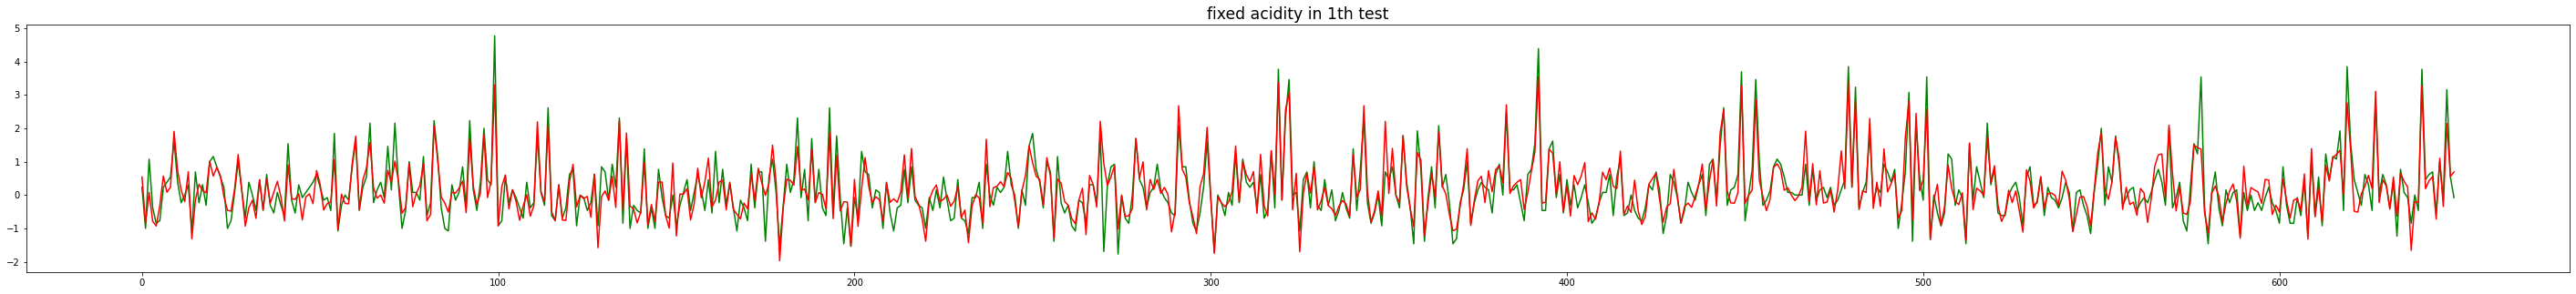

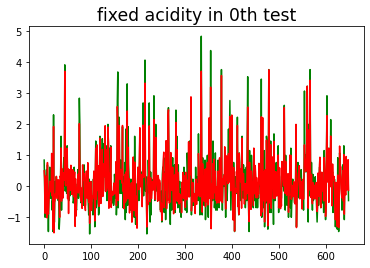

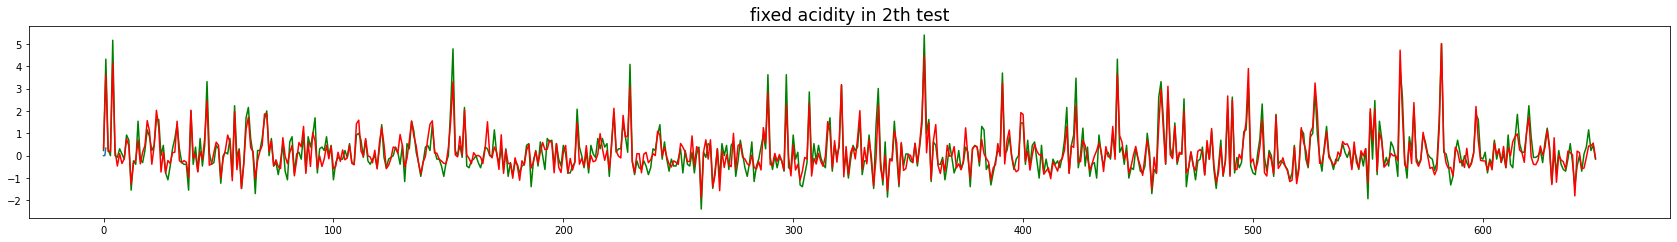

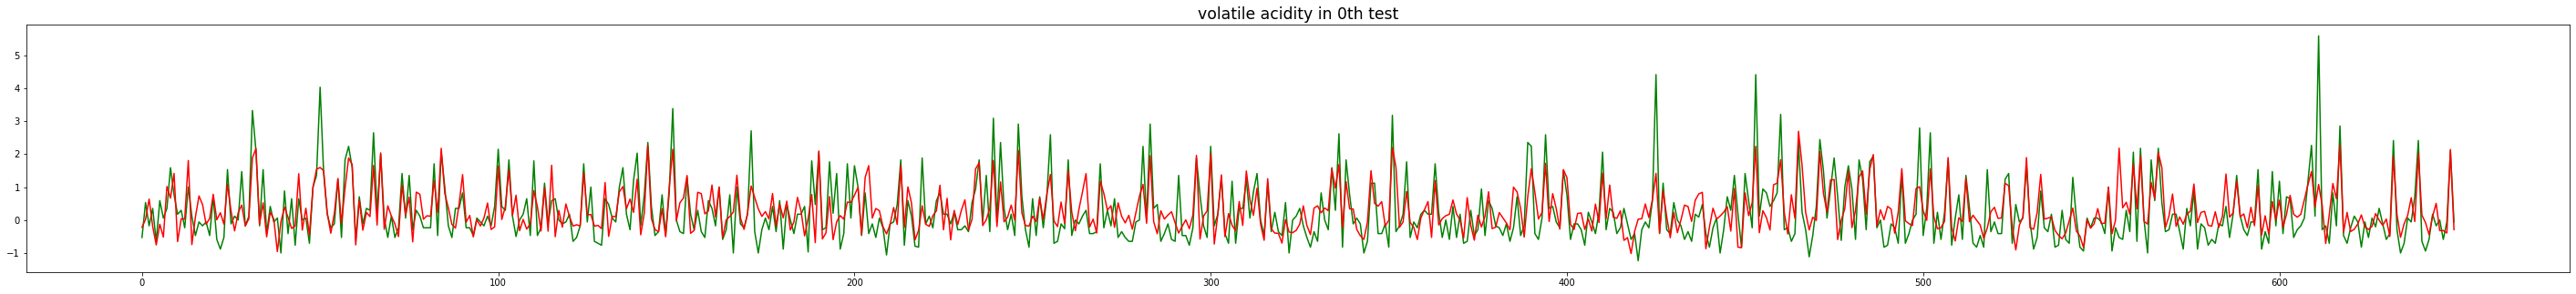

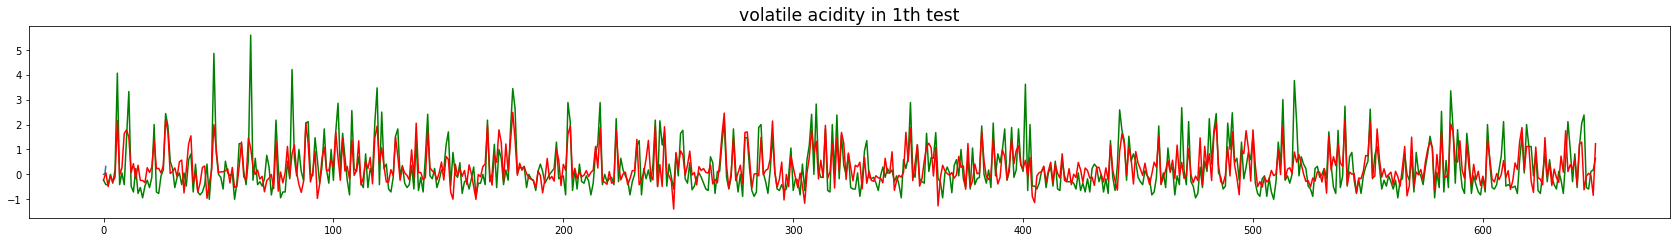

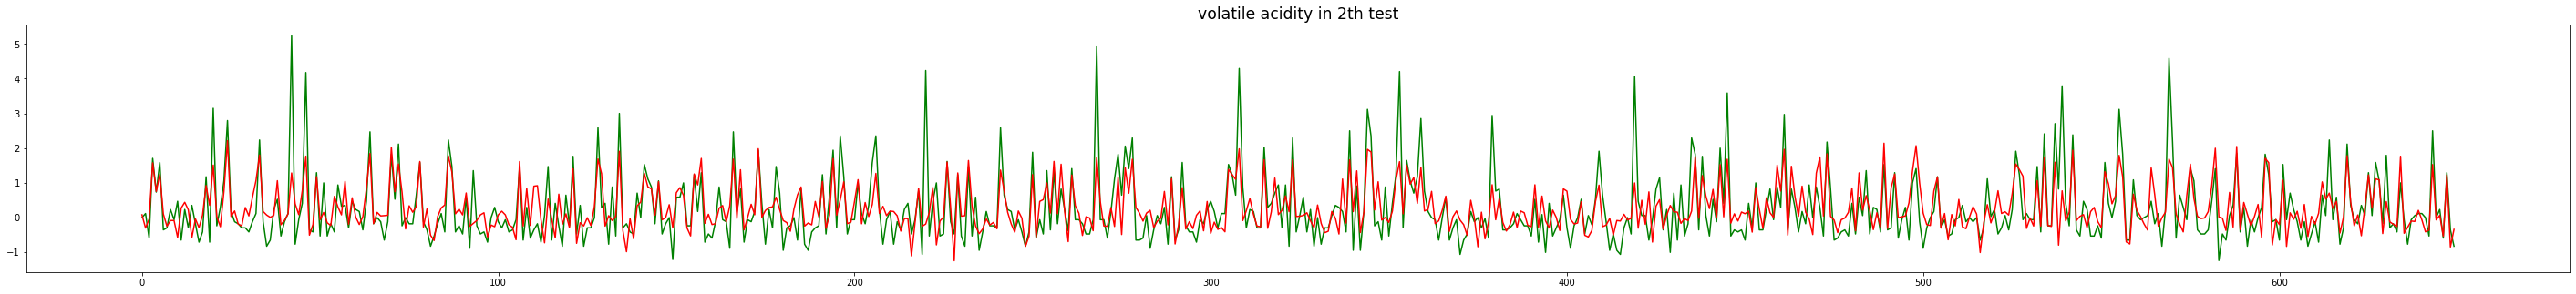

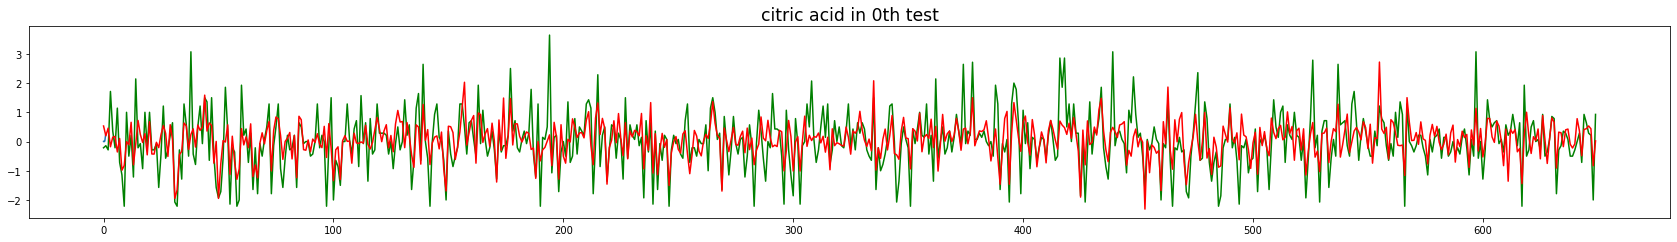

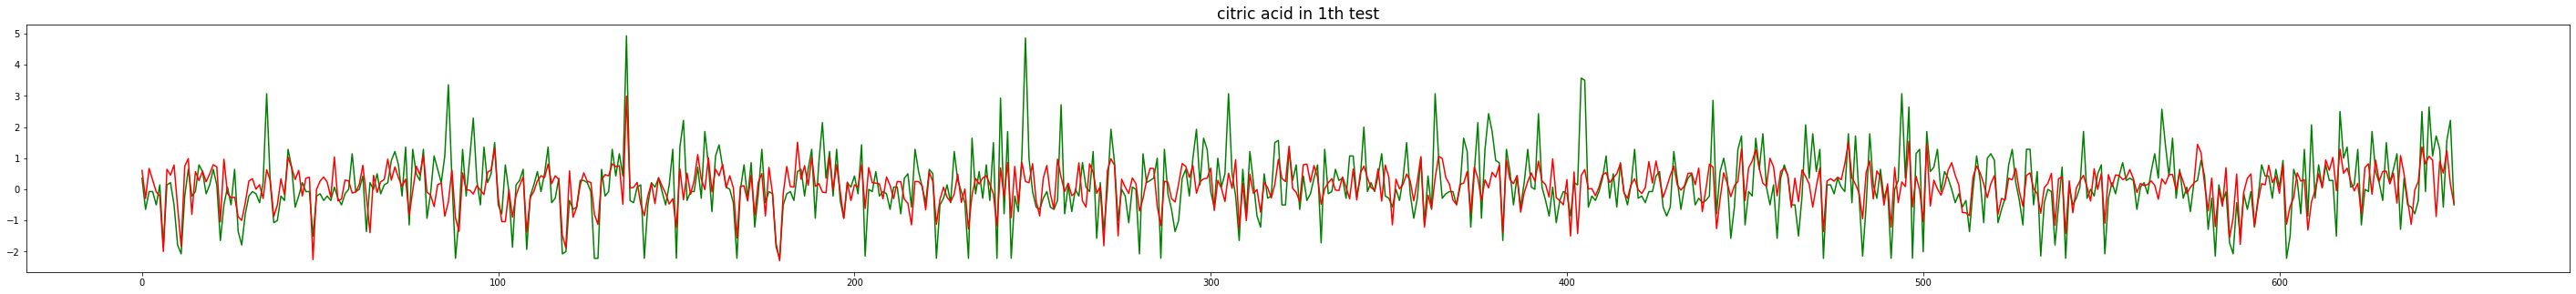

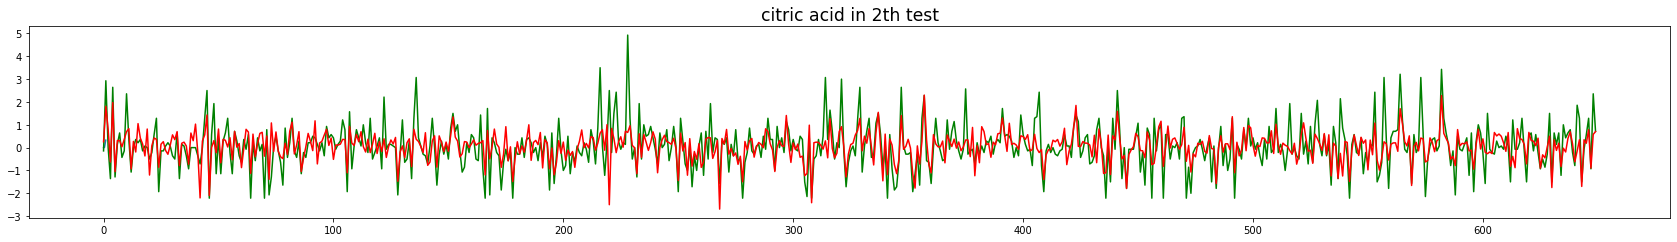

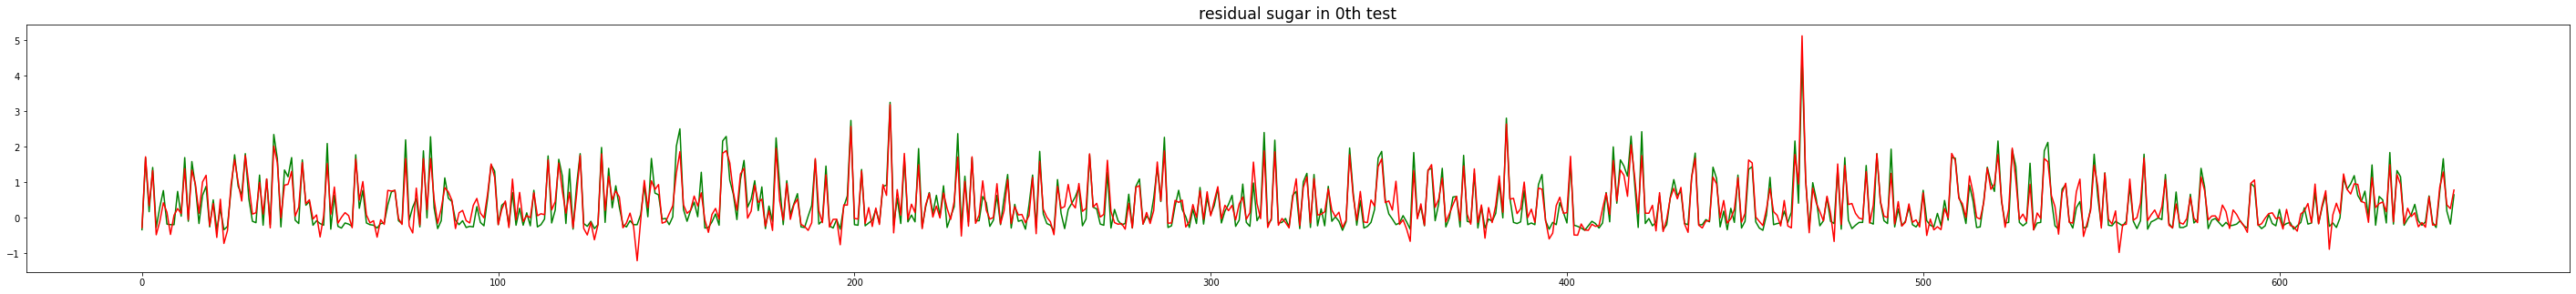

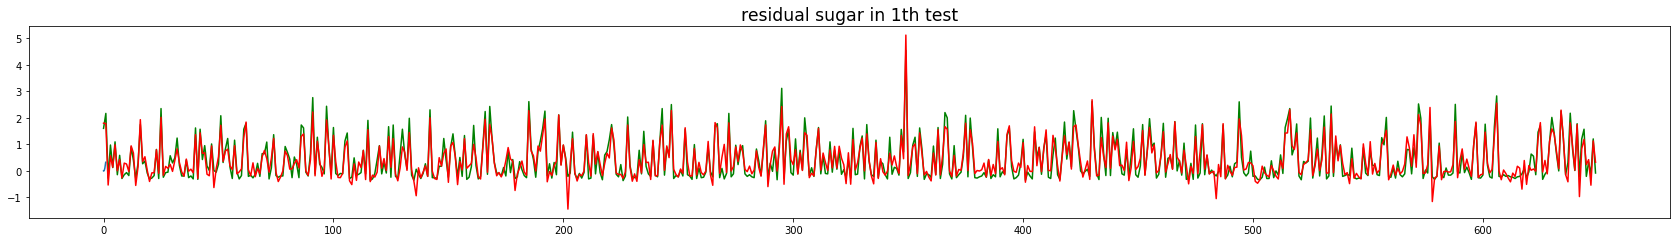

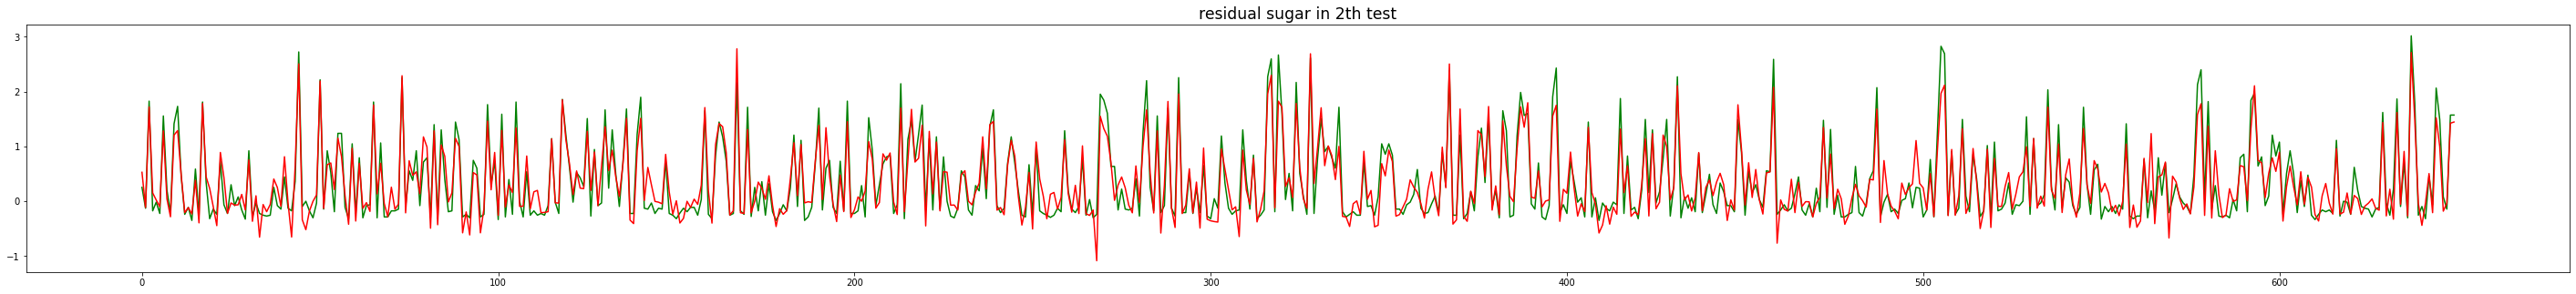

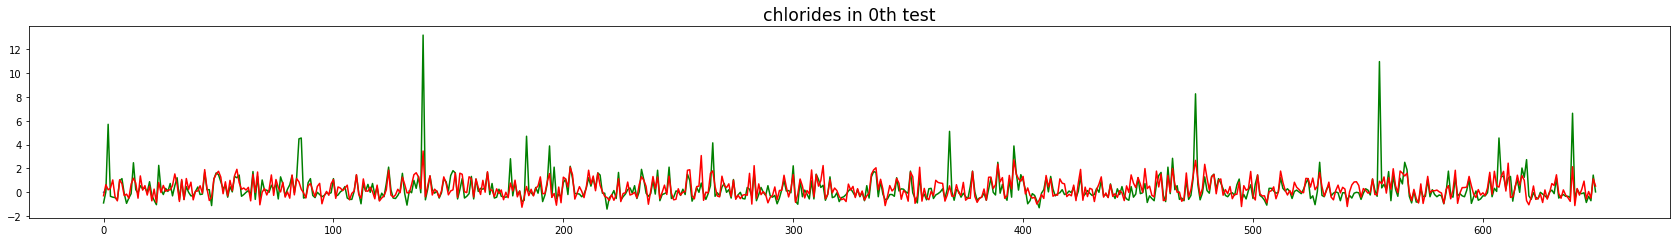

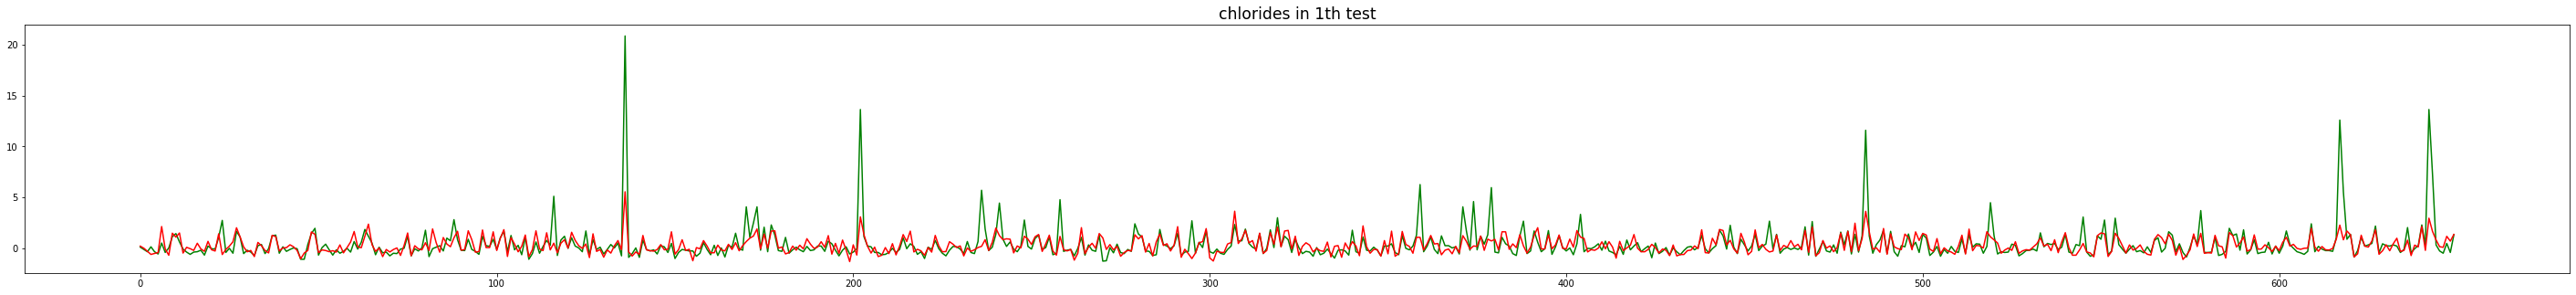

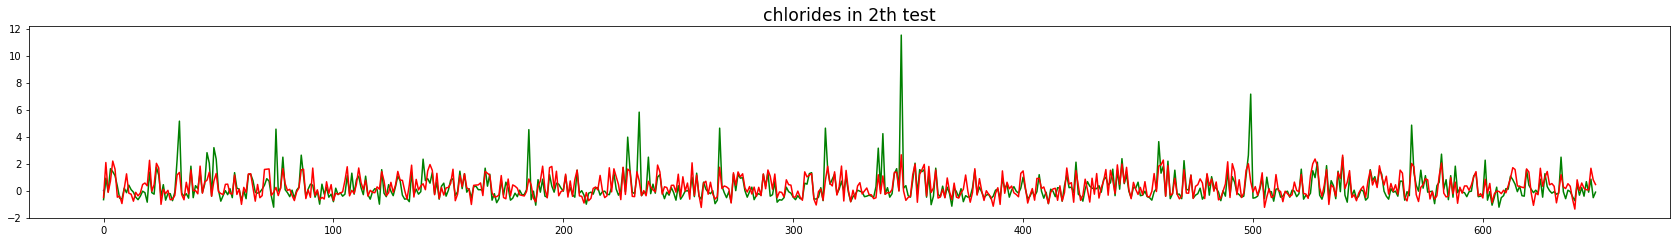

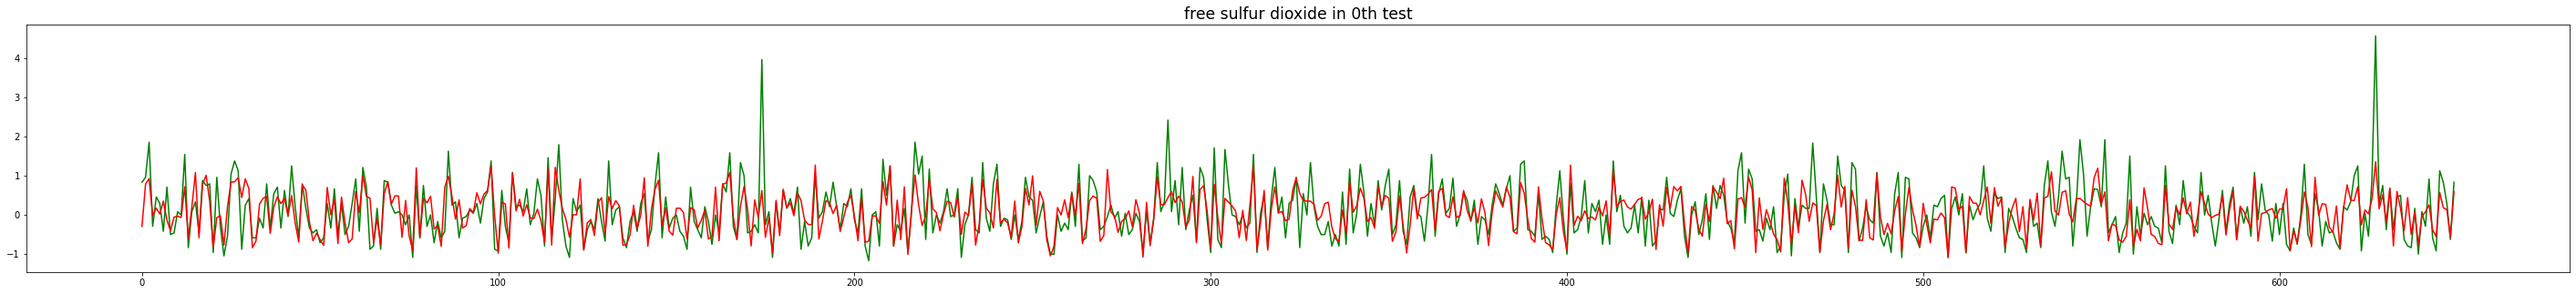

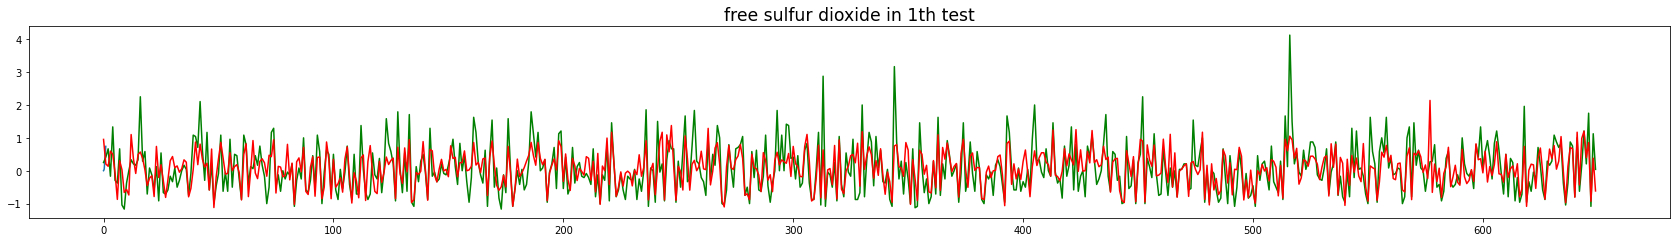

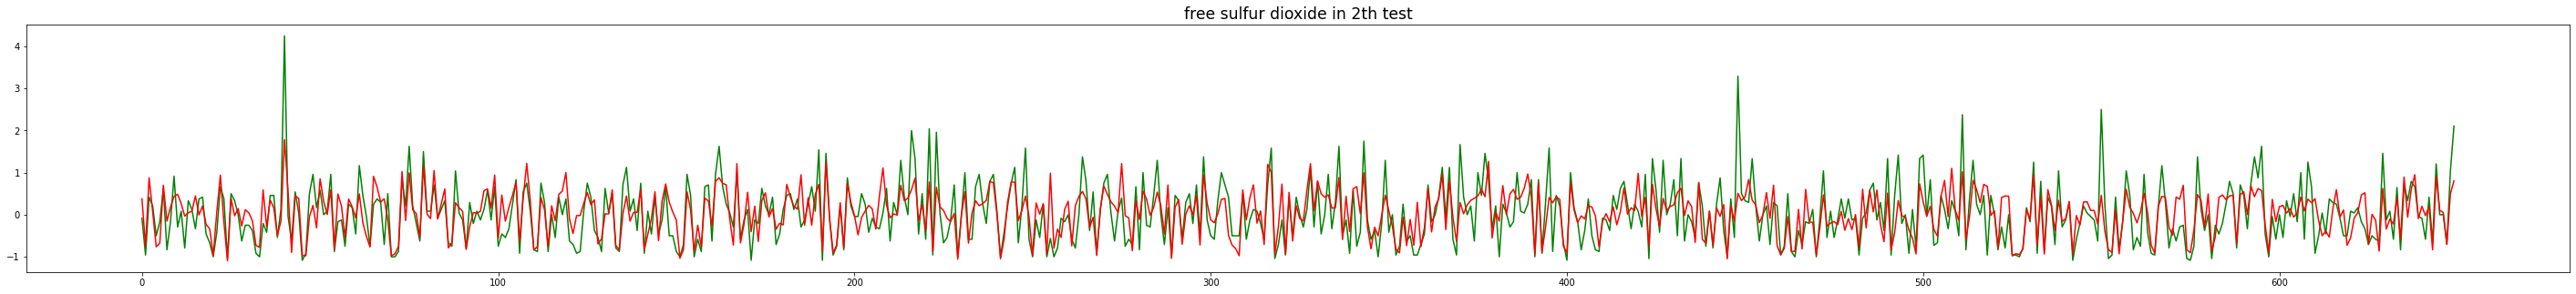

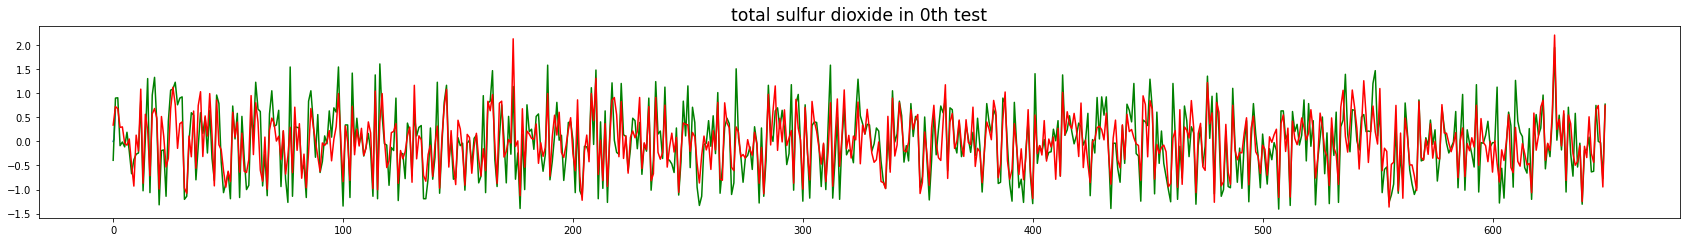

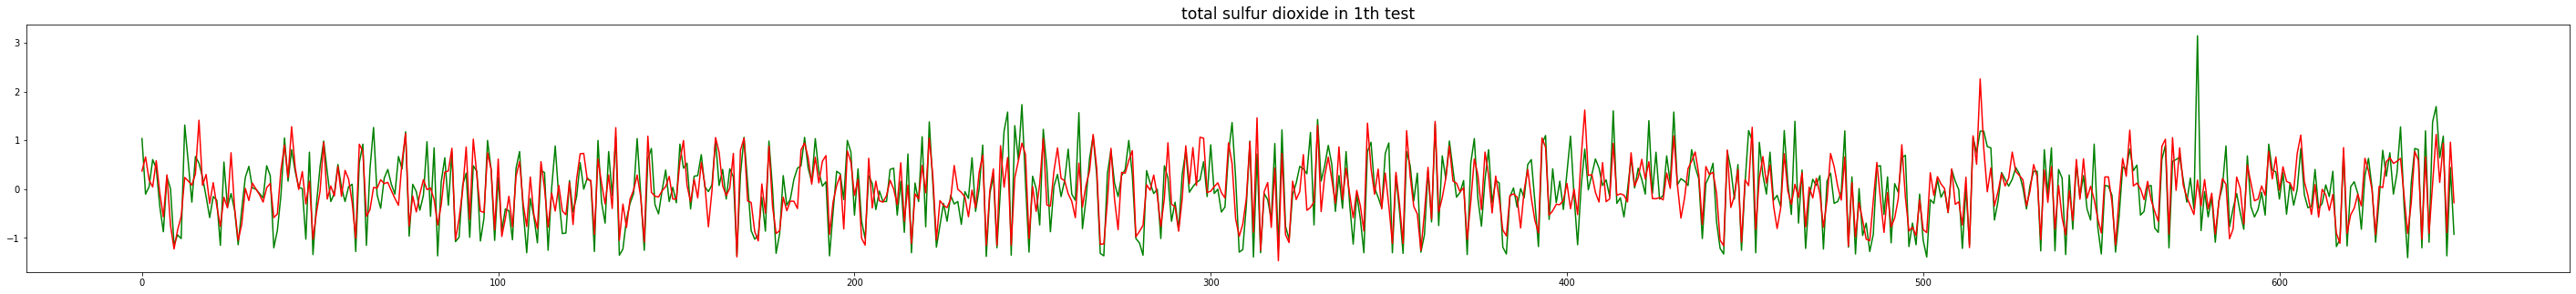

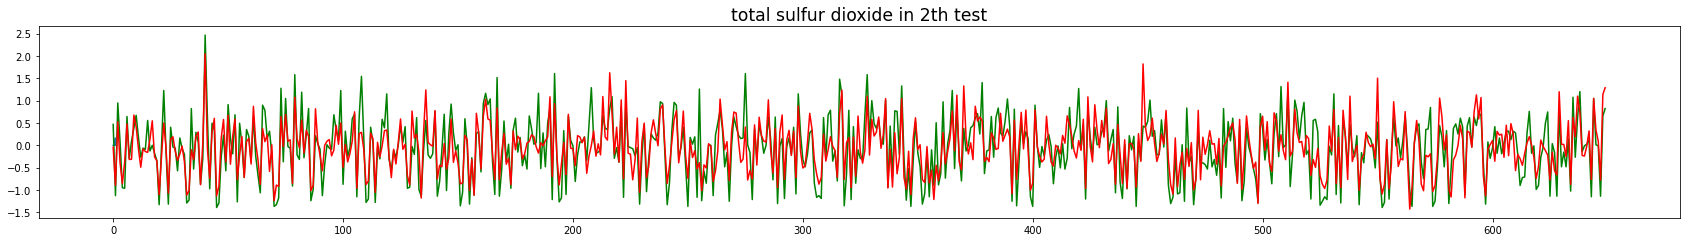

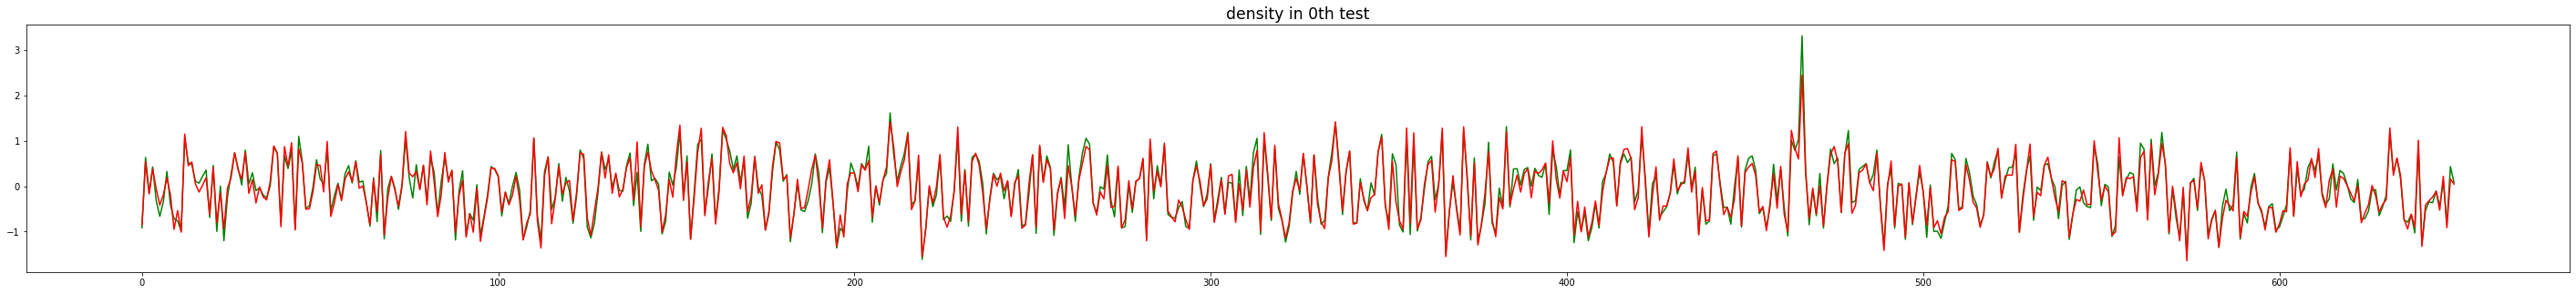

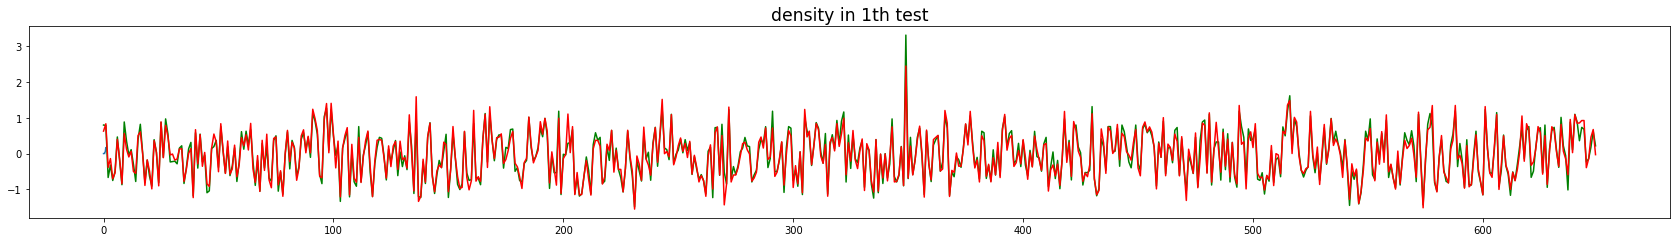

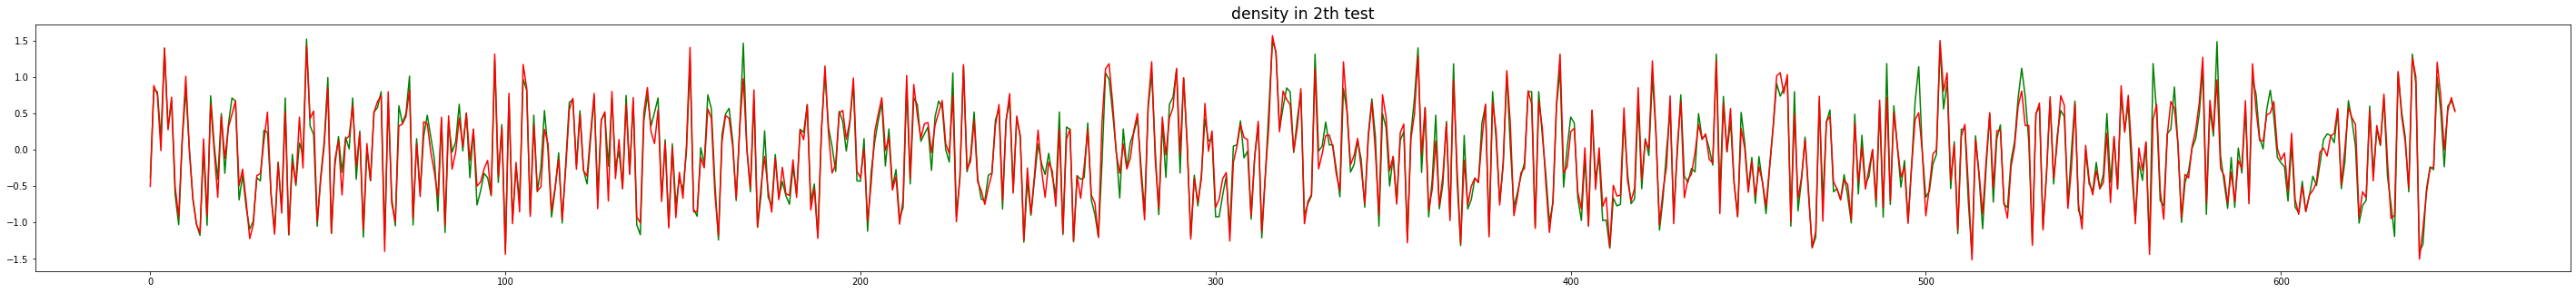

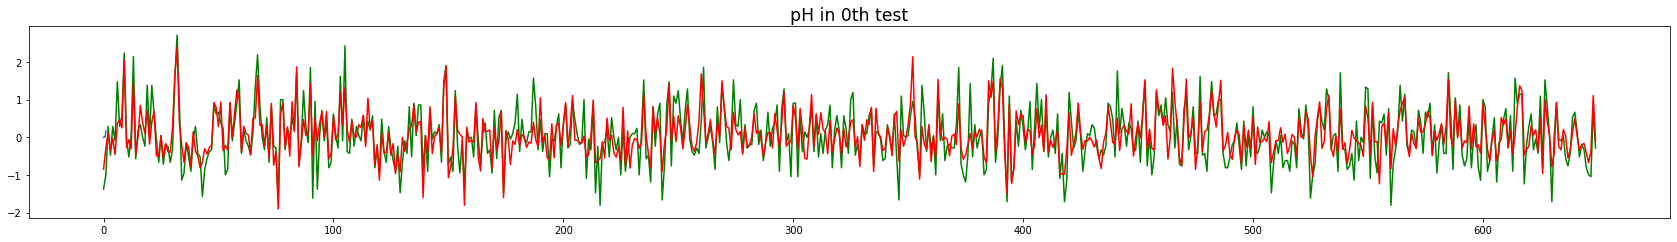

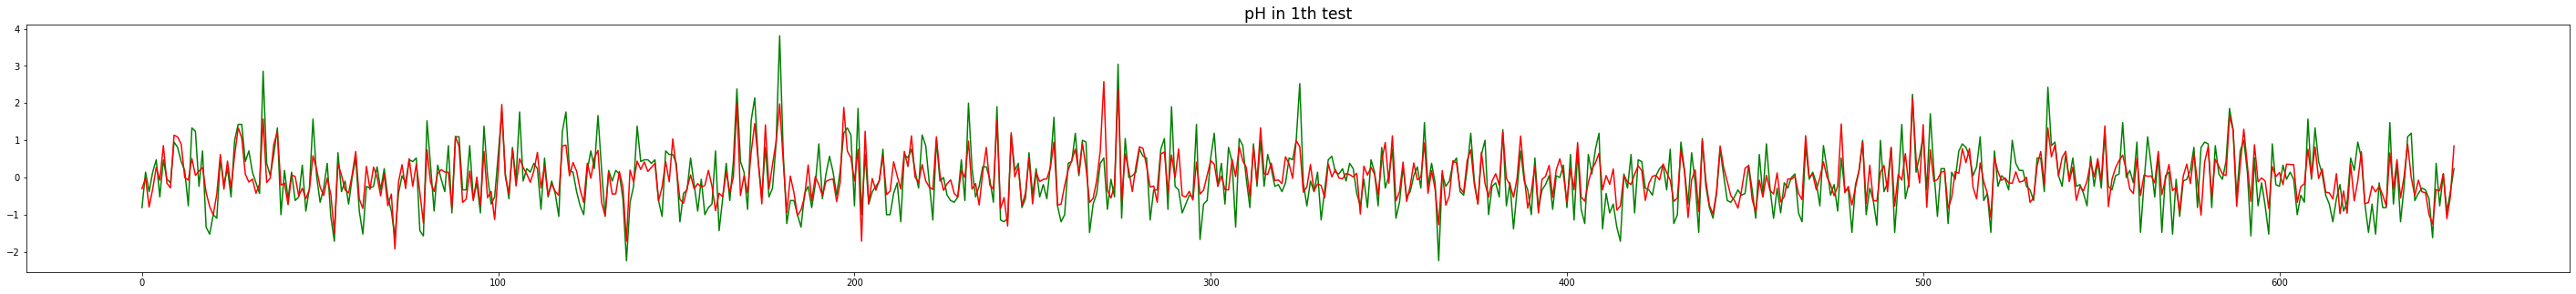

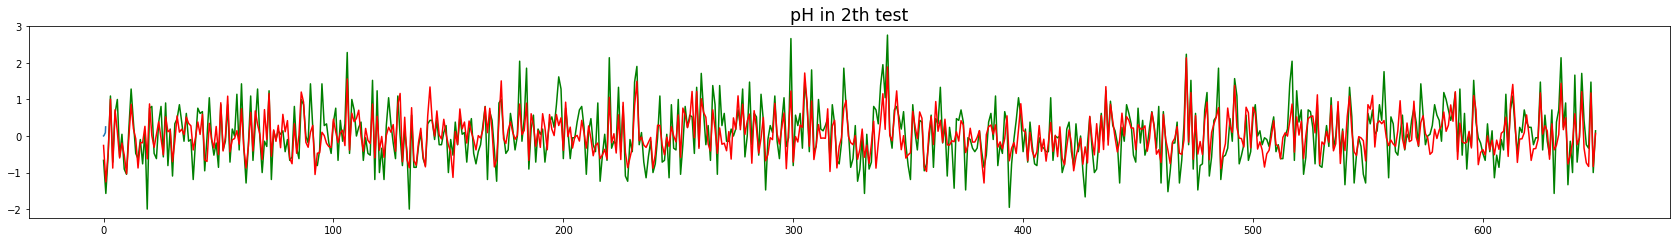

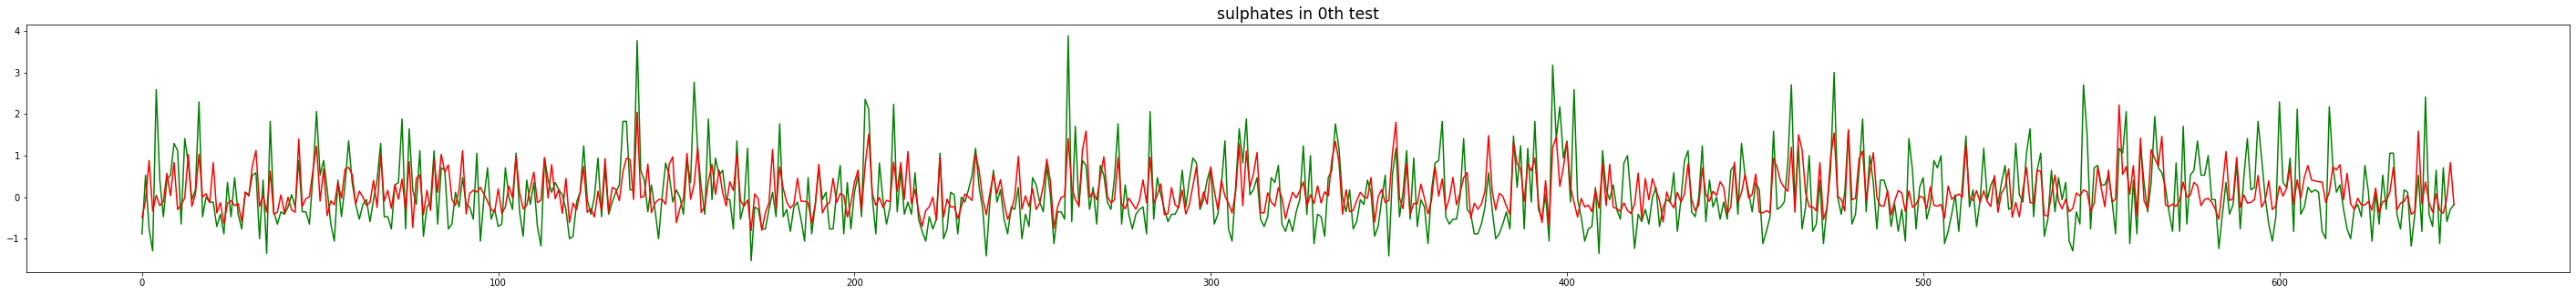

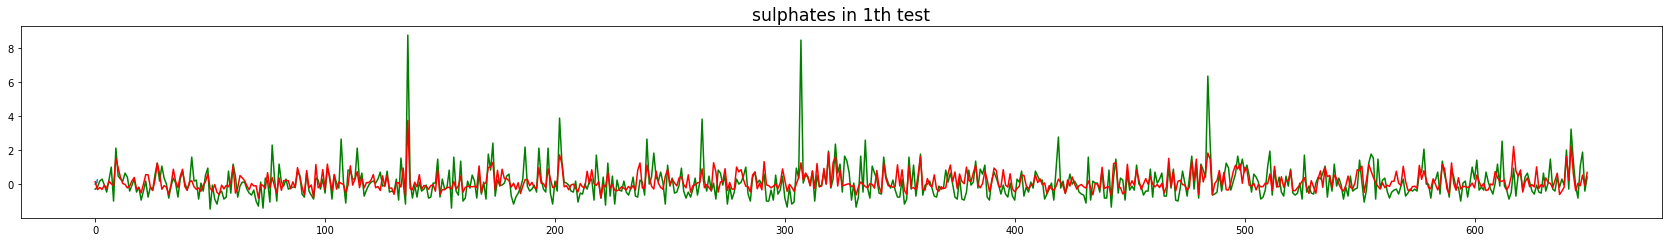

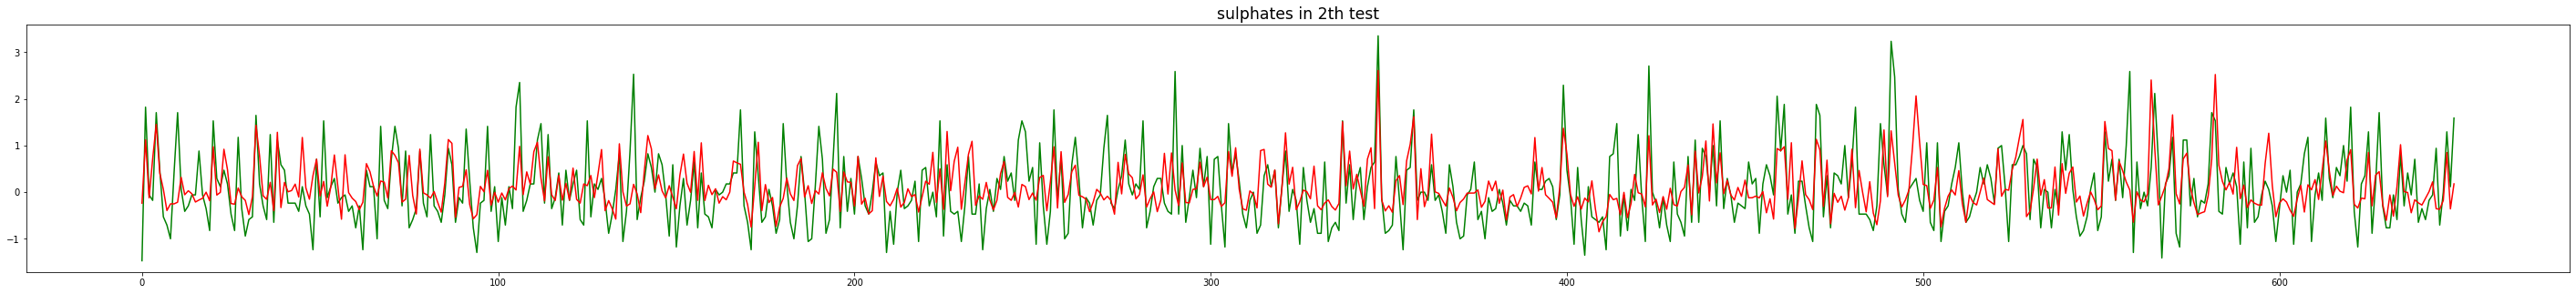

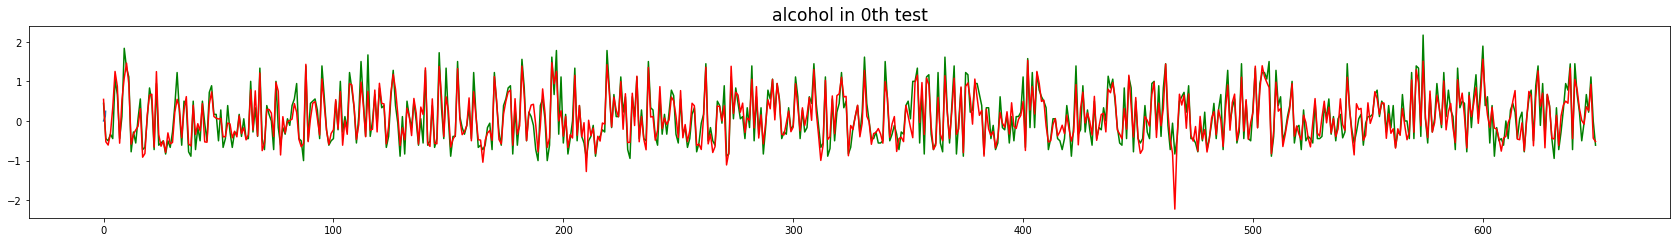

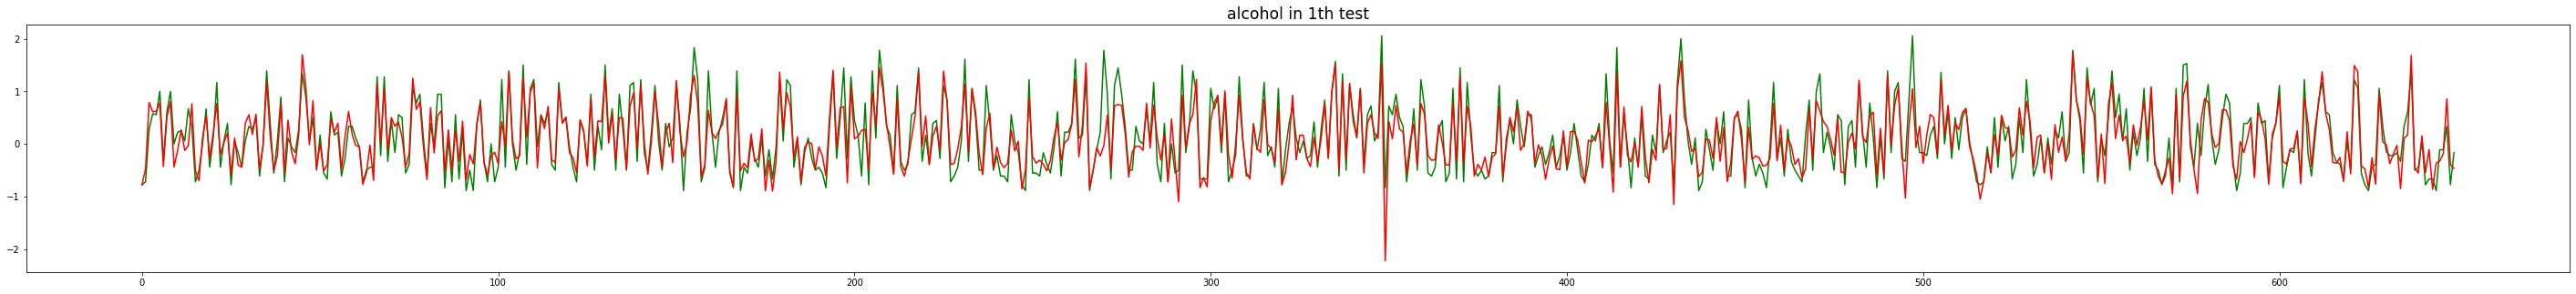

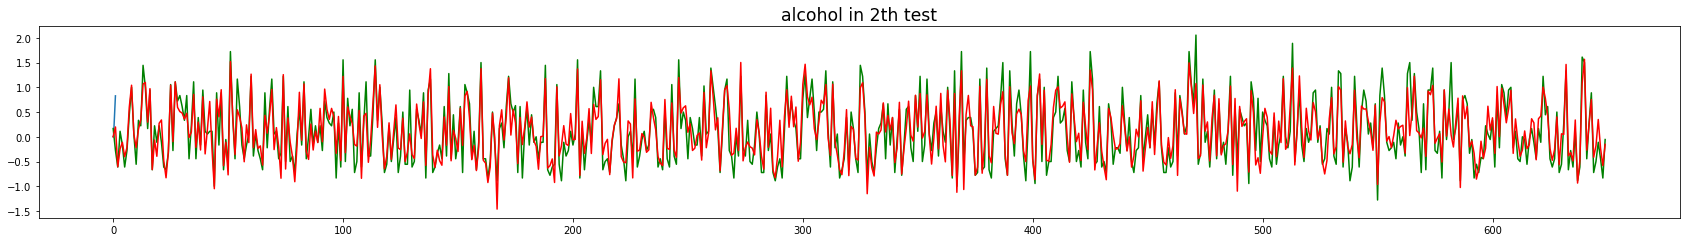

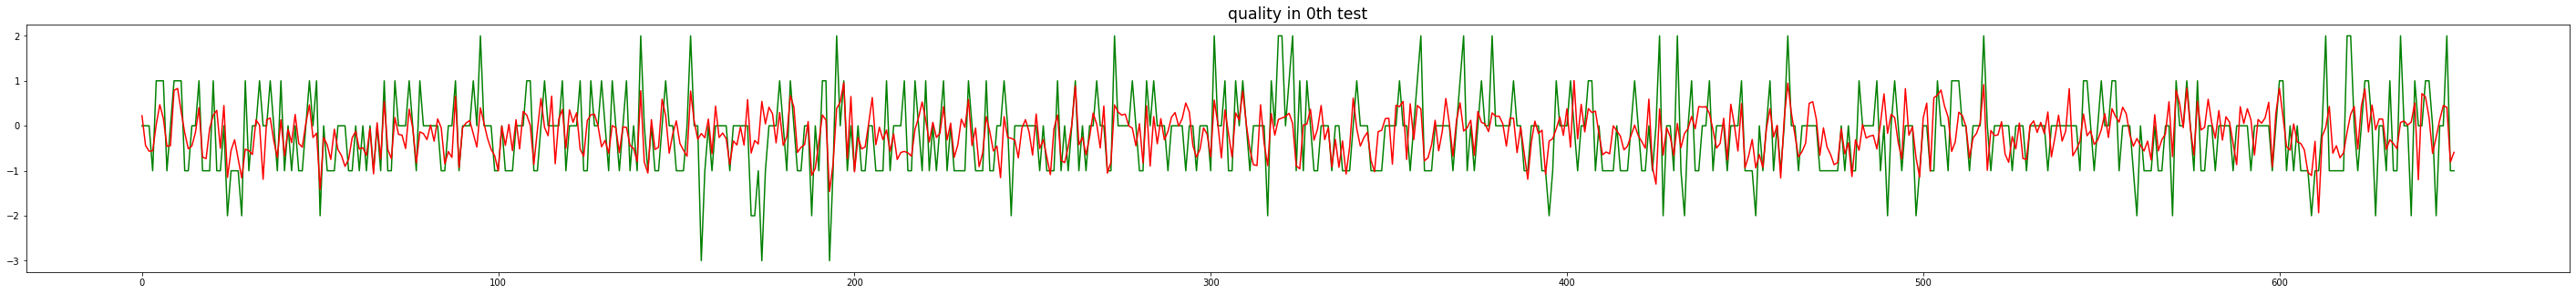

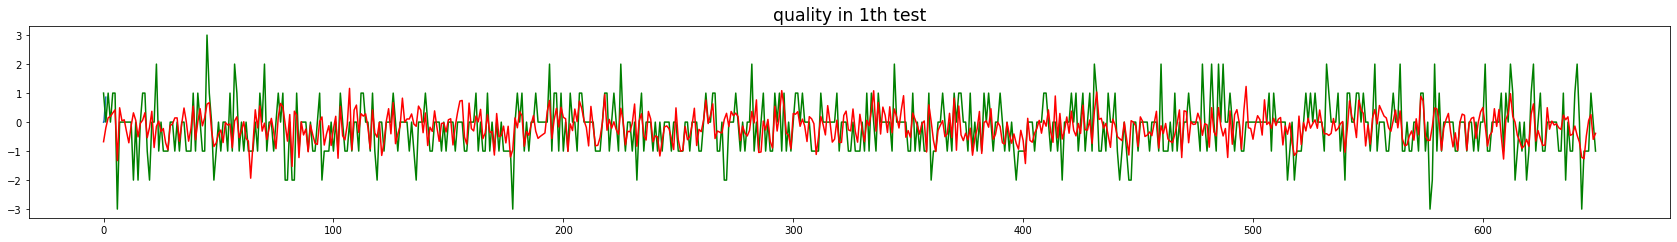

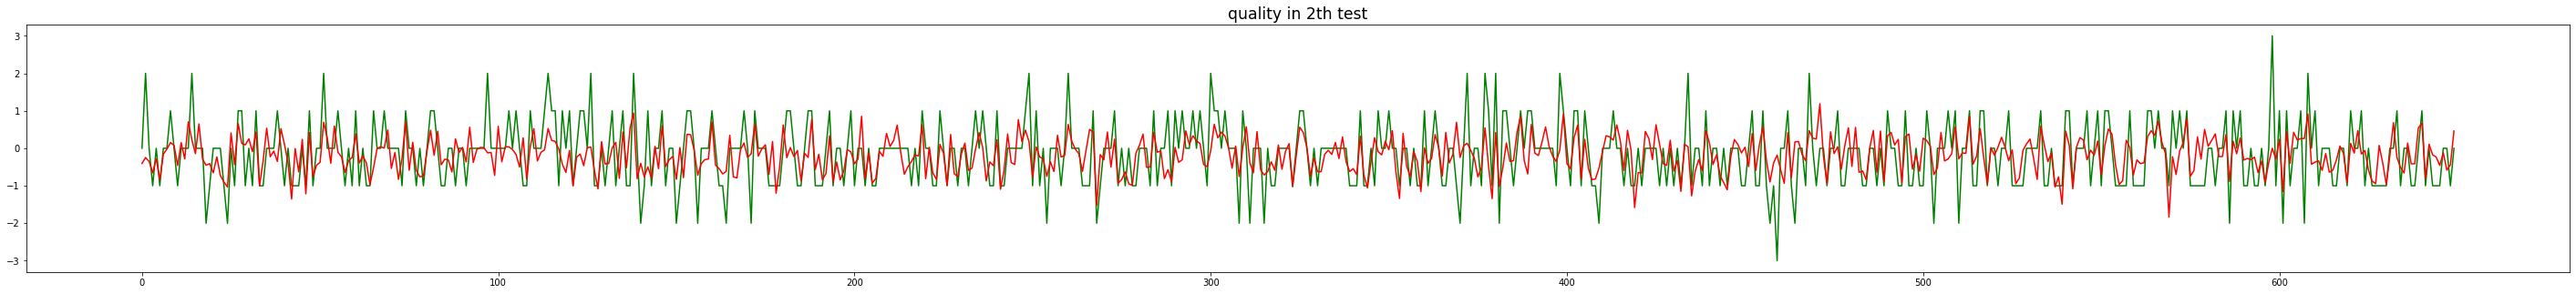

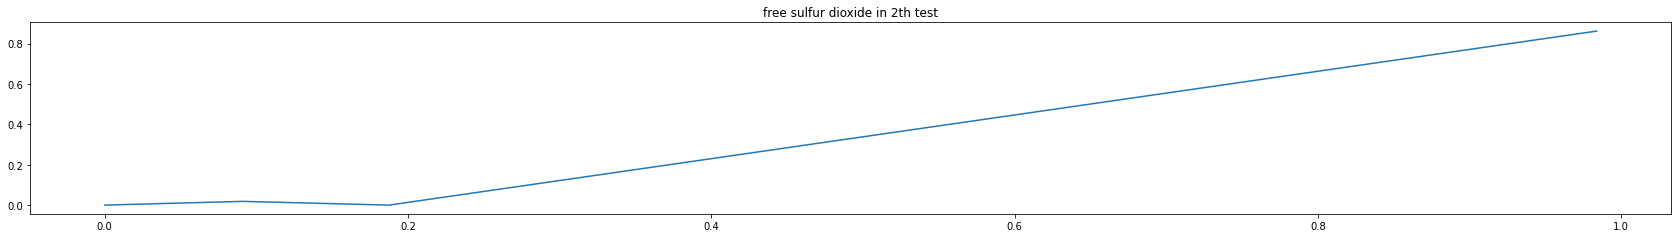

<Figure size 3600x360 with 0 Axes>

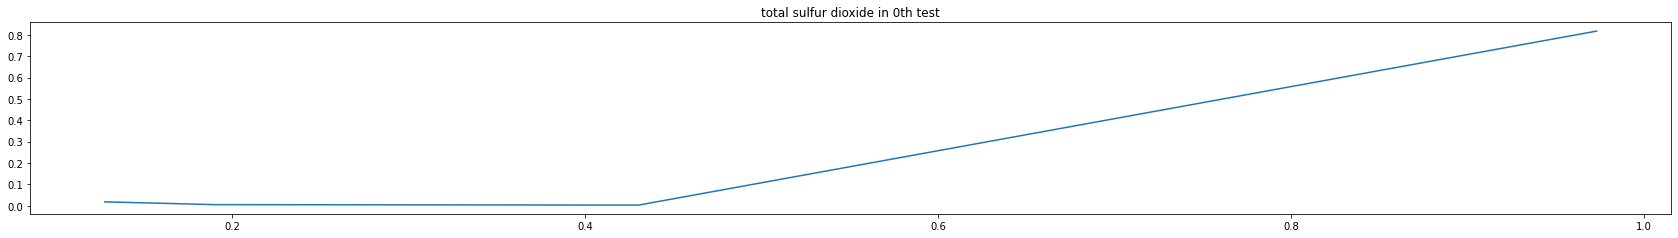

<Figure size 3600x360 with 0 Axes>

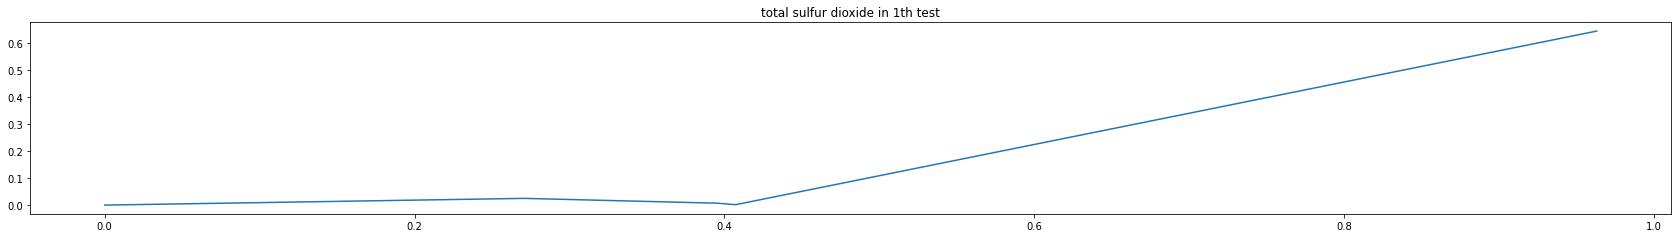

<Figure size 3600x360 with 0 Axes>

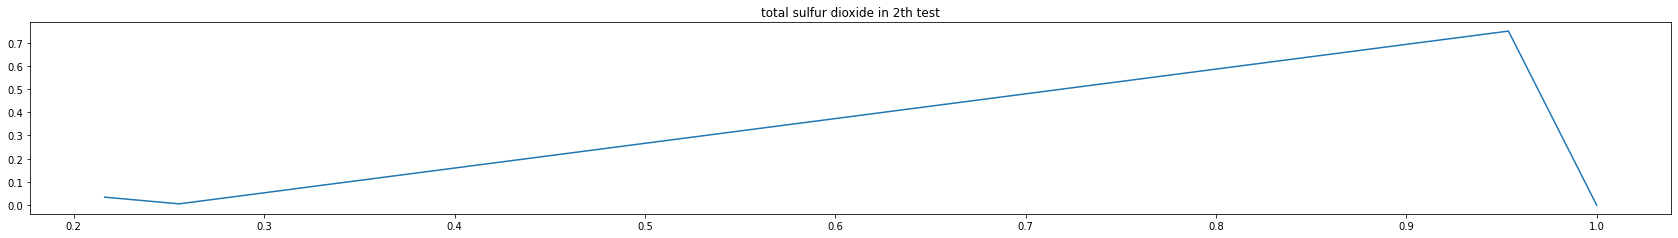

<Figure size 3600x360 with 0 Axes>

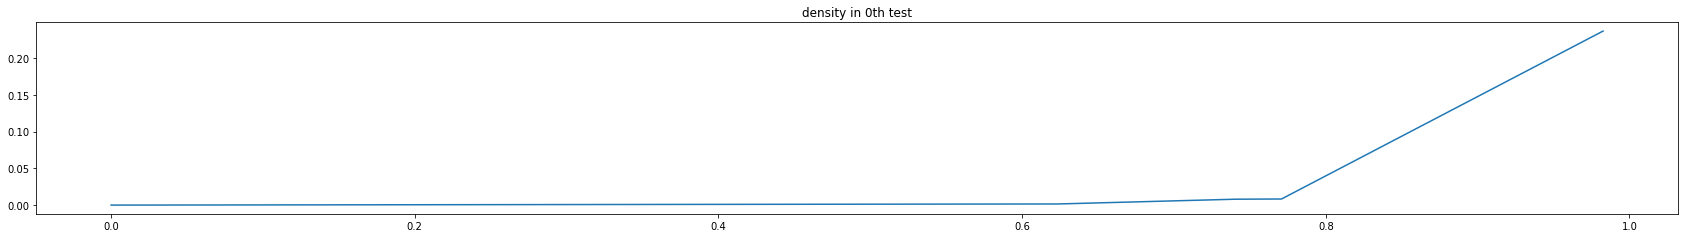

<Figure size 3600x360 with 0 Axes>

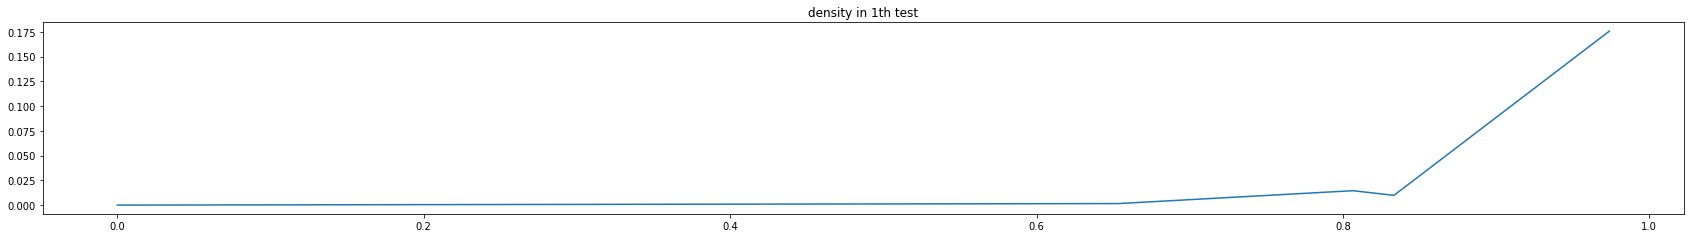

<Figure size 3600x360 with 0 Axes>

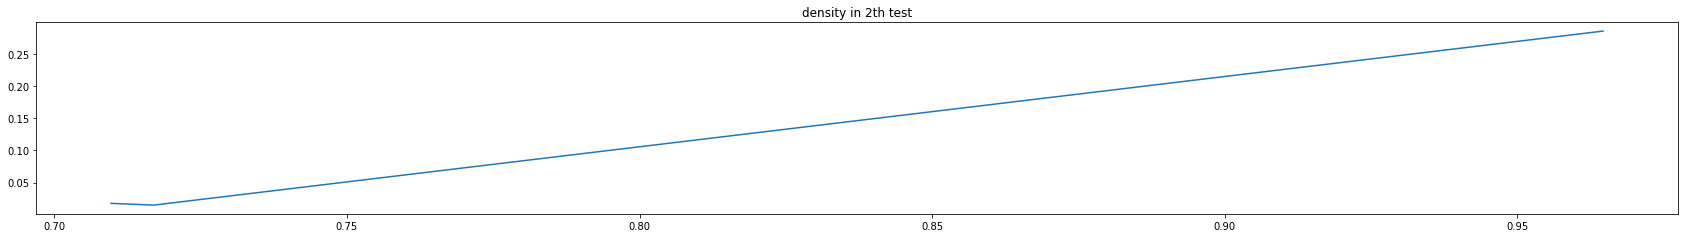

<Figure size 3600x360 with 0 Axes>

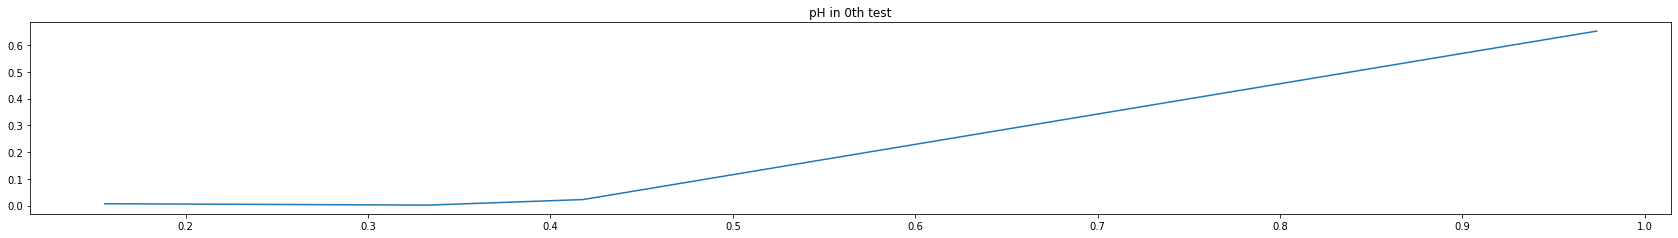

<Figure size 3600x360 with 0 Axes>

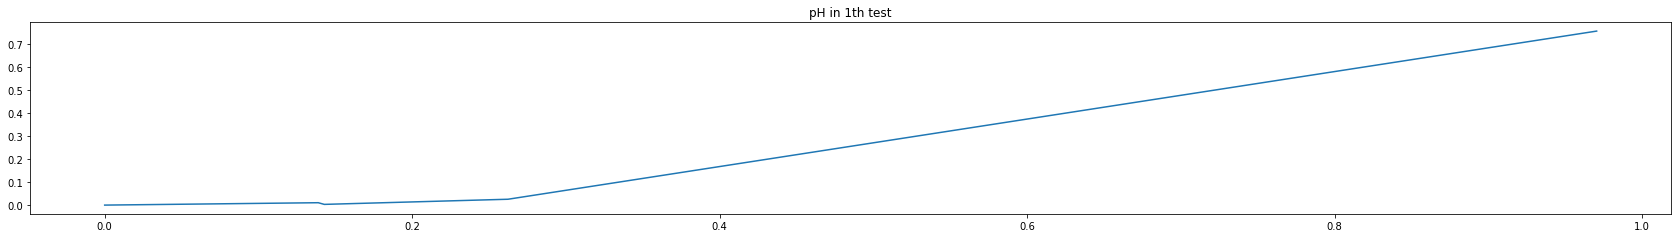

<Figure size 3600x360 with 0 Axes>

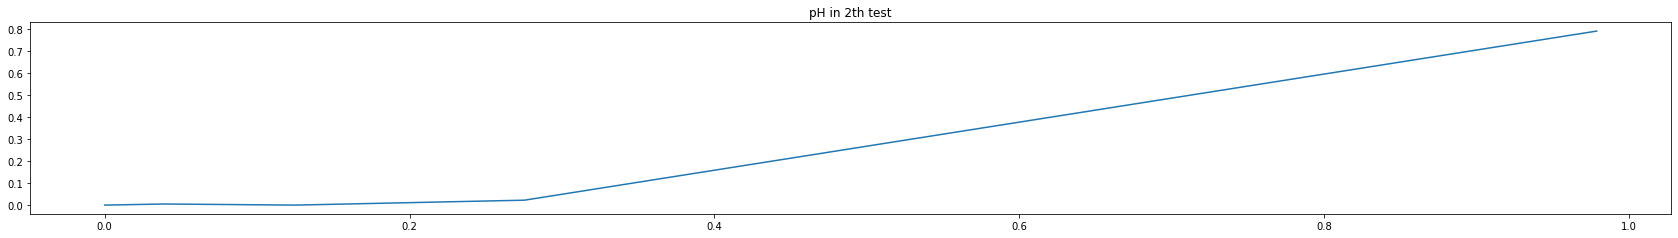

<Figure size 3600x360 with 0 Axes>

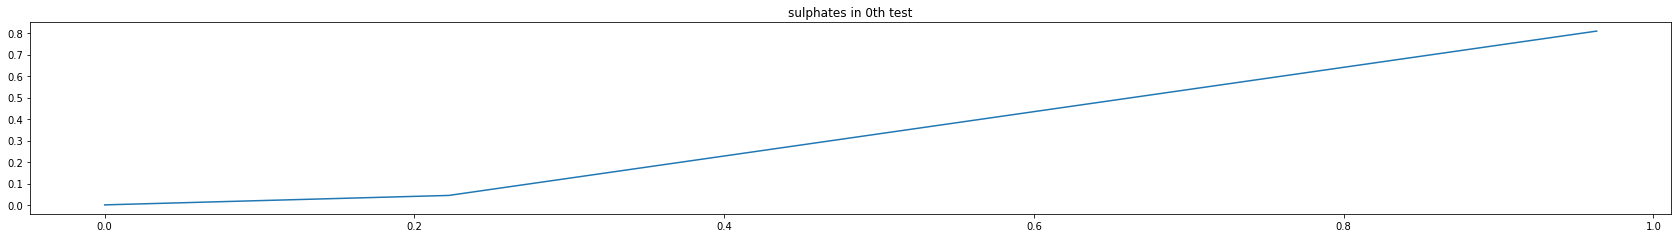

<Figure size 3600x360 with 0 Axes>

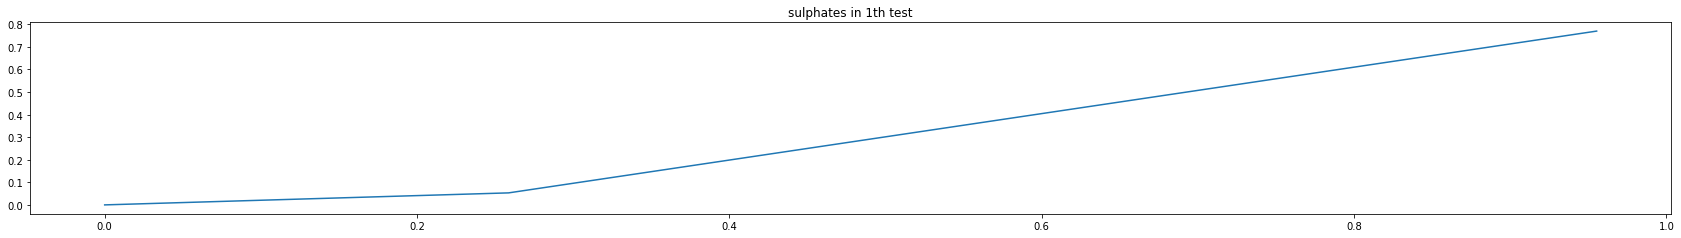

<Figure size 3600x360 with 0 Axes>

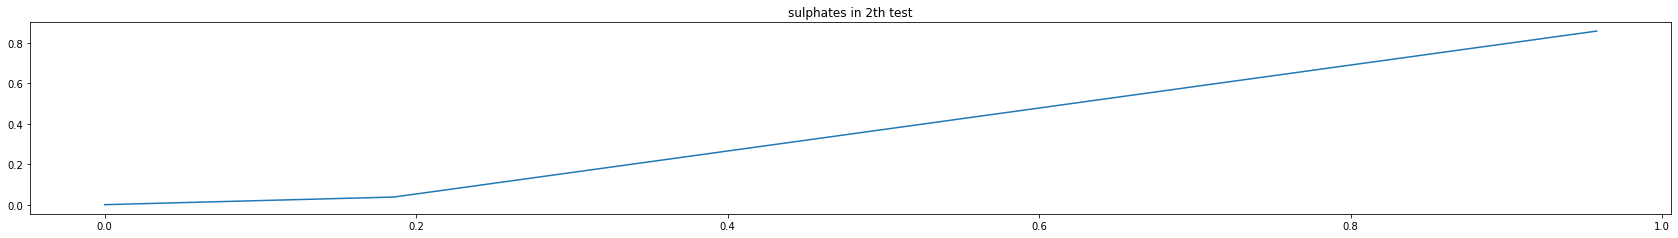

<Figure size 3600x360 with 0 Axes>

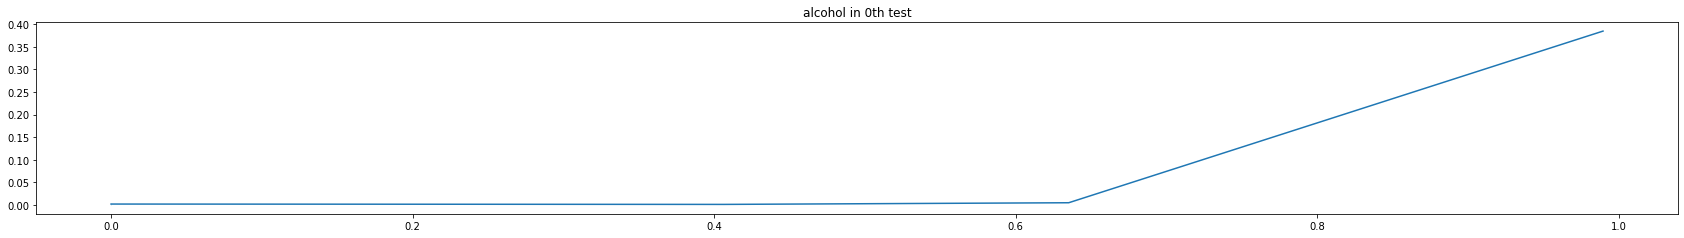

<Figure size 3600x360 with 0 Axes>

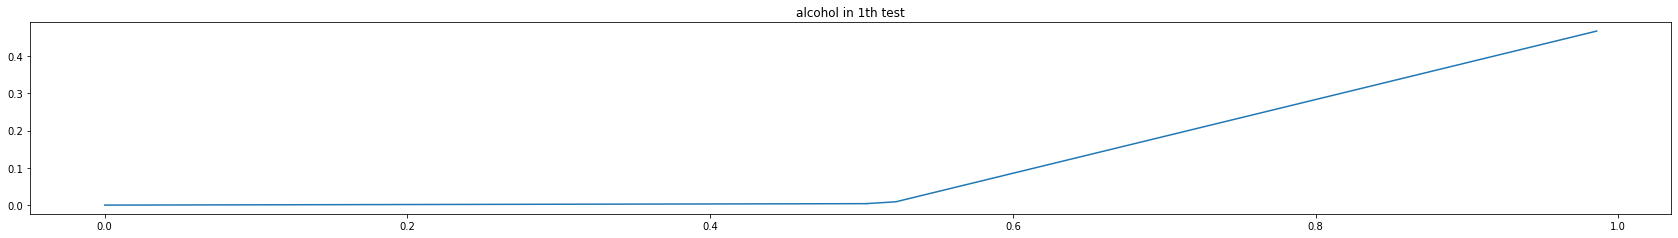

<Figure size 3600x360 with 0 Axes>

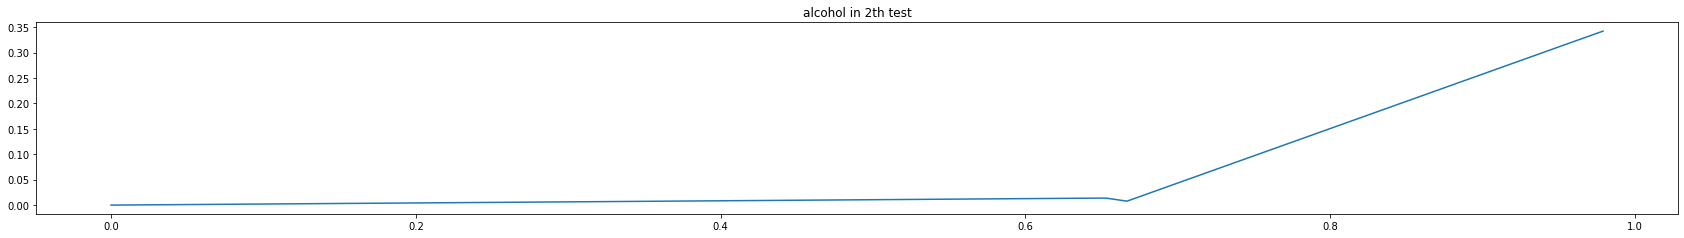

<Figure size 3600x360 with 0 Axes>

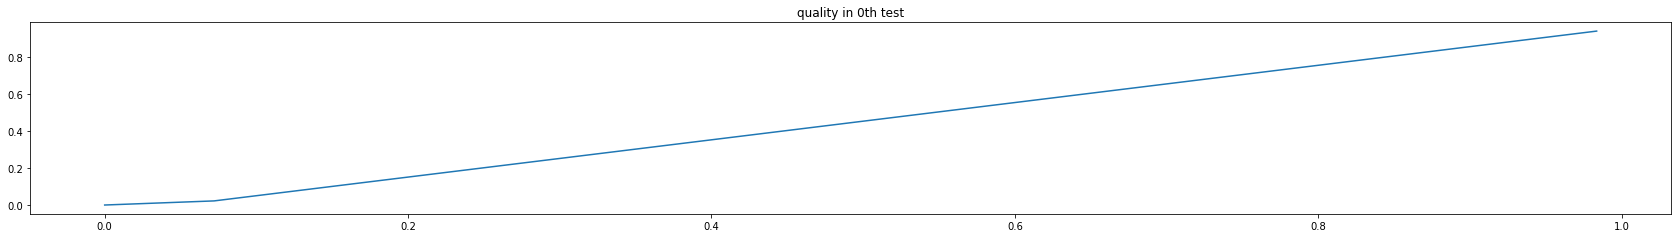

<Figure size 3600x360 with 0 Axes>

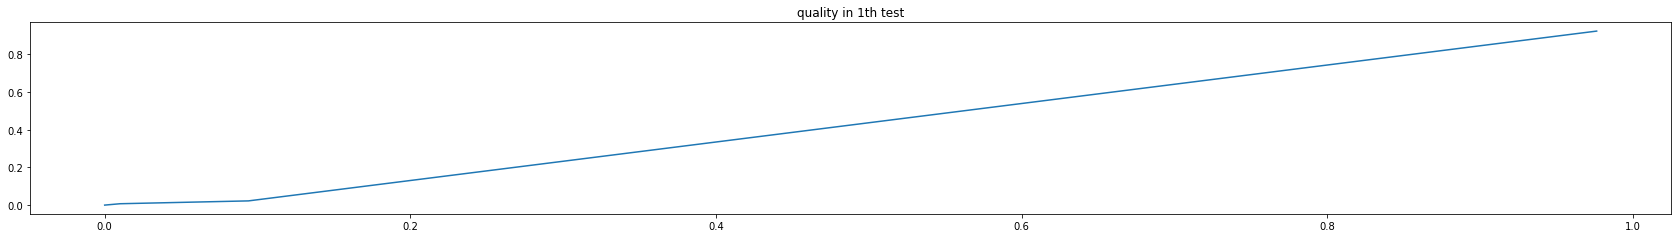

<Figure size 3600x360 with 0 Axes>

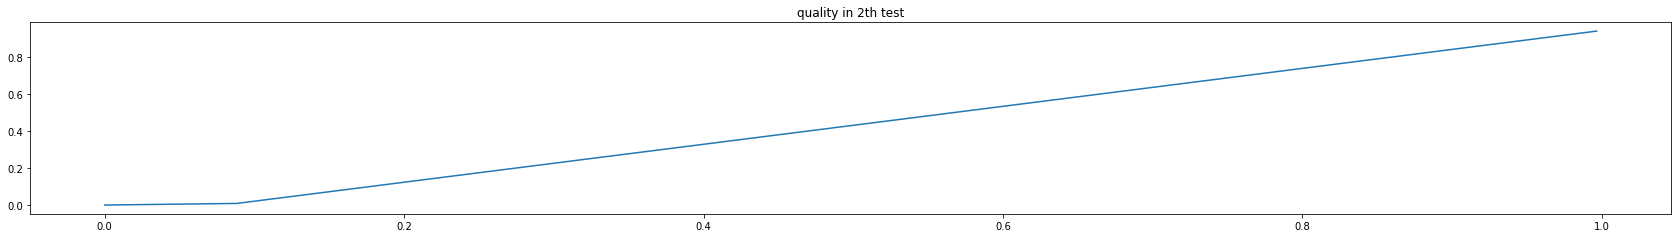

In [44]:
all_label_target = opt_data.columns
len_target = len(all_label_target)
index = 0
k = 0
while index < len_target:
  # Get needed data
  [X_train, X_test, Y_train, Y_test] = needed_data(opt_data, all_label_target[index], index)
  #Train
  j = 0
  while j < len(X_train):
    reg = LinearRegression().fit(X_train[j], Y_train[j])
    y_pred = reg.predict(X_test[j])
    rmse = math.sqrt(mean_squared_error(Y_test[j], y_pred))
    SD = KHOI_standard_deviation(Y_test[j], y_pred)
    acc = (r2_score(Y_test[j], y_pred) * 100)
    cmatrix = confusion_matrix(Y_test[j].astype(int), y_pred.astype(int))
    cal = re_cm(cmatrix)
    pra = reg.coef_
    print('\n')
    print("The Linear Regression Equation of {0} in {1}th test: \n{2}".format(all_label_target[index],j, Khoi_LE(pra)))
    print("The RMSE of {0} in {1}th test: {2}".format(all_label_target[index], j, rmse))
    print("The SD of {0} in {1}th test: {2}".format(all_label_target[index], j, SD))
    print("The Confusion matrix of {0} in {1}th test: \n{2}".format(all_label_target[index], j, cmatrix))
    print("The Accuracy is: {0} \nThe True positive rate is: {1} \nThe False Positive Rate is: {2} \nThe False Negative Rate is:{3} \nThe Precision is {4}\n".format(np.mean(cal[0]), np.mean(cal[1]), np.mean(cal[2]), np.mean(cal[3]), np.mean(cal[4])))
    print("The Mean Performance of {0} in {1}th test: {2}".format(all_label_target[index], j, mean([np.mean(cal[1]), np.mean(cal[2]), np.mean(cal[3]), np.mean(cal[4])])))
    print('\n')
    Khoi_Plot(Y_test[j], y_pred, k, "{0} in {1}th test".format(all_label_target[index], j))
    Khoi_ROC(cal[2], cal[1], j, "{0} in {1}th test".format(all_label_target[index], j))
    k += 1
    j += 1
  index += 1